# Supporting Information

This notebook describes the full procedure in details, including all the preprocessing of the data. It is supplied as supporting information in order to make the results fully reproducible and allow parameters to be easily fitted again on other datasets.

Full data are available at the following git repository: https://github.com/bussilab/shape-dca-data

Required modules are available on conda with the command:

```
conda install -c conda-forge numpy pandas matplotlib sklearn xlrd
conda install -c bioconda viennarna
```

## S1 Data extraction
In this section we load all the data from the file `data.p` into the pandas DataFrame `data`.


We will have, for each molecule: code-name of the reference PDB file (`pdb`), sequence (`seq_pdb`) and secondary structure (`stru`) extracted from the PDB file; chemical probing raw reads (`r1` for the control channel and `r2` for the reaction one) when available, reactivities (`react`) reported in the rdat files if RMDB is the source of the SHAPE data (specified in `source`) and, if present, reference paper (`ref`); DCA score matrix (`dca`).

In [1]:
## Import useful Python modules
import numpy as np
import pandas as pd
import subprocess as sp
import matplotlib.pyplot as plt
import os
import sklearn
import xlrd # used to import xls files
import RNA as rna # python interface to ViennaRNA

data = pd.read_pickle('data.p')

### S1.1 Chemical probing data
PDBs of the molecules for which SHAPE data are reported in the paper for the first time, measured in Sattler's Lab, are:

$\texttt{1KXK}\\ \texttt{2GIS}\\ \texttt{3IRW}\\ \texttt{3SD3}\\ \texttt{3VRS}\\ \texttt{4XW7}$

More SHAPE data are taken from the RMDB database (.rdat files):


$\texttt{1EHZ}\quad \texttt{TRNAPH_1M7_0000.rdat}\\ \texttt{1Y26}\quad\texttt{ADDRSW_1M7_0001.rdat}\\ \texttt{2GDI}\quad\texttt{TPPRSW_1M7_0001.rdat}\\ \texttt{4L81}\quad\texttt{RNAPZ8_1M7_0001.rdat}\\ \texttt{4P8Z}\quad\texttt{GIR1RZ_DMS_0000.rdat}\\ \texttt{4QLM}\quad\texttt{YDAORS_DMS_0000.rdat}\\ \texttt{4YBB}\quad\texttt{5SRRNA_1M7_0001.rdat}\\ \texttt{5KPY}\quad\texttt{RNAPZ9_1M7_0001.rdat}$

For other molecules chemical probing data are taken either from 10.1073/pnas.1219988110 ($\texttt{3DIG}$, $\texttt{3IGI}$ and $\texttt{3PDR}$) or from 10.1261/rna.047068.114 ($\texttt{1NBS}$).

### S1.2 DCA score matrix

DCA score matrix are here read. They were originally generated from multiple sequence alignments using the ClustalW alignment software and the Boltzmann learning DCA implemented here: https://github.com/bussilab/bl-dca. In particular, the score matrices can be generated with the following commands:

##### Example for 1EHZ.

To align multiple sequences we use ClustalW:
```
./clustalo -i RF00005.fa -o MSA.clu --outfmt=clu  
```
Then we run the scripts from  https://github.com/bussilab/bl-dca. 

The first script generates a file called `seqs` using multiple parllelized processors. The number of processors must be specified.
```
./run.sh MSA.clu <number_of_processors>
```

Next the Boltzmann learning DCA code must be run in the following way:
```
mpirun -np <number_of_processors> dca.o
```

The DCA scores are output to a file named `scores`. In order to let it be read into the dataset, move it to the right directory (see next cell).
```
mv scores ./data/dca_scores/scores_1EHZ
```
Here is the list of RFAM files included for the systems in the dataset:
```
1EHZ     RF00005.fa
1KXK     RF00029.fa
1NBS     RF00011.fa
1Y26     RF00167.fa
2GDI     RF00059.fa
2GIS     RF00162.fa
3DIG     RF00168.fa
3IGI     RF02001.fa
3IRW     RF01051.fa
3PDR     RF00380.fa
3SD3     RF01831.fa
3VRS     RF01734.fa
4L81     RF01725.fa
4P8Z     RF01807.fa
4QLM     RF00379.fa
4XW7     RF01750.fa
4YBB_CB  RF00001.fa
5KPY     RF01982.fa
```

In [2]:
#Here's the dataset
data

pdb                                               stru  \
0      1EHZ  (((((((..((((.....[..)))).((((.........))))......   
1      1KXK  .....(((..(((((...(((((((((((((((....)))))..))...   
2      1Y26  ((((((((((..((((((......[[.))))))[.....)](((((...   
3      2GDI  ((((((((.((((.(((.[[..))))))......)..))))........   
4      2GIS  ((((((((....(.(((...(((.[.[[)))......))))(((.....   
5      3DIG  (((((((((..(.((((((..(.......(((((((((..(..[[[...   
6      3IRW  ..((((......((...((((((....))))))..[))...(((.(...   
7      3PDR  ((((((((([.(((..(((..((((((((......(((((((((((...   
8      3SD3  ((((....((((((((((((......(((((((...[[[[[...))...   
9      3VRS  .[[[[..((((((]]]]......(((((....)))))....)))))...   
10  4YBB_CB  ((((((((((.....((((((((....(((((((...(.....).....   
11     4L81  (((((....((((....))))(((..((((((.[[[[..))).)))...   
12     4P8Z  (((((..(((((..(((((((((...[[[.)))))))))..((((....   
13     4XW7  (((((((..((........(((((....))))).))..)))))))(...   
14     1NBS  (((((((((((..........))))))((((......))).)((.(...   
15     5KPY  ((((((......(.(((((.....[[))))))..(.......((((...   
16     4QLM  ..((((....((((((....(..(((((....(((((((....)))...   
17     3IGI  .[..(((((...(((((((((((...(((.......)))..(((((...   

                                                  seq  \
0   GCGGAUUUAGCUCAGUUGGGAGAGCGCCAGACUGAAGAUCUGGAGG...   
1   GUCUACCUAUCGGGCUAAGGAGCCGUAUGCGAUGAAAGUCGCACGU...   
2   CGCUUCAUAUAAUCCUAAUGAUAUGGUUUGGGAGUUUCUACCAAGA...   
3   GACUCGGGGUGCCCUUCUGCGUGAAGGCUGAGAAAUACCCGUAUCA...   
4   GGCUUAUCAAGAGAGGUGGAGGGACUGGCCCGAUGAAACCCGGCAA...   
5   GGCCGACGGAGGCGCGCCCGAGAUGAGUAGGCUGUCCCAUCAGGGG...   
6   GUCACGCACAGGGCAAACCAUUCGAAAGAGUGGGACGCAAAGCCUC...   
7   GGGCUUCGUUAGGUGAGGCUCCUGUAUGGAGAUACGCUGCUGCCCA...   
8   GGAGAGUAGAUGAUUCGCGUUAAGCGUGUGUGAAUGGGAUGUCGUC...   
9   GGGCGAUGAGGCCCGCCCAAACUGCCCUGAAAAGGGCUGAUGGCCU...   
10  UGCCUGGCGGCCGUAGCGCGGUGGUCCCACCUGACCCCAUGCCGAA...   
11  GGAUCACGAGGGGGAGACCCCGGCAACCUGGGACGGACACCCAAGG...   
12  GGUUGGGUUGGGAAGUAUCAUGGCUAAUCACCAUGAUGCAAUCGGG...   
13  GGGUCGUGACUGGCGAACAGGUGGGAAACCACCGGGGAGCGACCCU...   
14  GCGAGCCUAGCGAAGUCAUAAGCUAGGGCAGUCUUGGCUGACGGCA...   
15  GGACACUGAUGAUCGCGUGGAUAUGGCACGCAUUGAAUUGUUGGAC...   
16  AUCGCUGAACGCGGGGGACCCAGGGGGCGAAUCUCUUCCGAAAGGA...   
17  UGUGCCCGGCAUGGGUGCAGUCUAUAGGGUGAGAGUCCCGAACUGU...   

                                                   r1  \
0   [1941.0, 368.0, 151.0, 235.0, 5019.0, 1516.0, ...   
1   [0.0, 5757.07, 8084.96, 1349.31, 1728.15, 7404...   
2   [5508.0, 3318.0, 370.0, 503.0, 3695.0, 496.0, ...   
3   [2541.0, 583.0, 2645.0, 558.0, 273.0, 176.0, 1...   
4   [2063.1529761904762, 2063.1529761904762, 2063....   
5                                                None   
6   [0.0, 0.0, 33278.2606741573, 106310.3, 20898.5...   
7                                                None   
8   [3308.593846153846, 3308.593846153846, 3308.59...   
9   [22047.625416666666, 22047.625416666666, 22047...   
10  [90.0, 52.0, 44.0, 42.0, 24.0, 62.0, 19.0, 2.0...   
11                                               None   
12                                               None   
13  [523.44, 677.73, 1213.67, 2227.27, 2634.03, 40...   
14  [3783536, 2902, 4437, 0.0, 4320, 968, 5047, 52...   
15                                                NaN   
16                                                NaN   
17                                                NaN   

                                                   r2  \
0   [277.0, 104.0, 85.0, 100.0, 537.0, 271.0, 147....   
1   [0.0, 6943.0, 8570.87, 2127.98, 2876.36, 9562....   
2   [7714.0, 10507.0, 2221.0, 3077.0, 27306.0, 265...   
3   [4315.0, 835.0, 3149.0, 681.0, 370.0, 280.0, 2...   
4   [1045.2678571428573, 1045.2678571428573, 1045....   
5                                                None   
6   [0.0, 0.0, 22528.90674157303, 3897.57, 5761.29...   
7                                                None   
8   [2768.019102564103, 2768.019102564103, 2768.01...   
9   [24998.3806

## S2 Structures and structure-probing data profiles
Chemical probing reactivity and coevolutionary profiles of the molecules in our dataset are shown in this section.

### S2.1 Reactivity profiles and DCA score matrices

#### Reactivity normalization

If raw reads are not available, but SHAPE reactivities are, we normalize a reactivity profile by subtracting its mean from it. In case of missing values, typically indicated by a value of -999.0, we replace them with the mean of the profile.

If raw reads are available, we process them into SHAPE reactivities in the following way:
1. Reads in the control channel $r^{(1)}$ are divided by their sum
\begin{equation}
R^{(1)}_i = \frac{r^{(1)}_i}{\sum\limits_{j=1}^{l_{seq}}r^{(1)}_j}
\end{equation}
2. Reads in the reaction channel $r^{(2)}$ are divided by their sum
\begin{equation}
R^{(2)}_i = \frac{r^{(2)}_i}{\sum\limits_{j=1}^{l_{seq}}r^{(2)}_j}
\end{equation}
3. Normalized SHAPE reactivities are obtained by subtraction of the read profiles, with replacement of negative values with 0:
\begin{equation}\label{norm}
N_i = \max{\{0,\quad R^{(2)}_i-R^{(1)}_i\}}
\end{equation}

In the cell below we plot, for each molecule, the reactivity profiles and the DCA couplings.

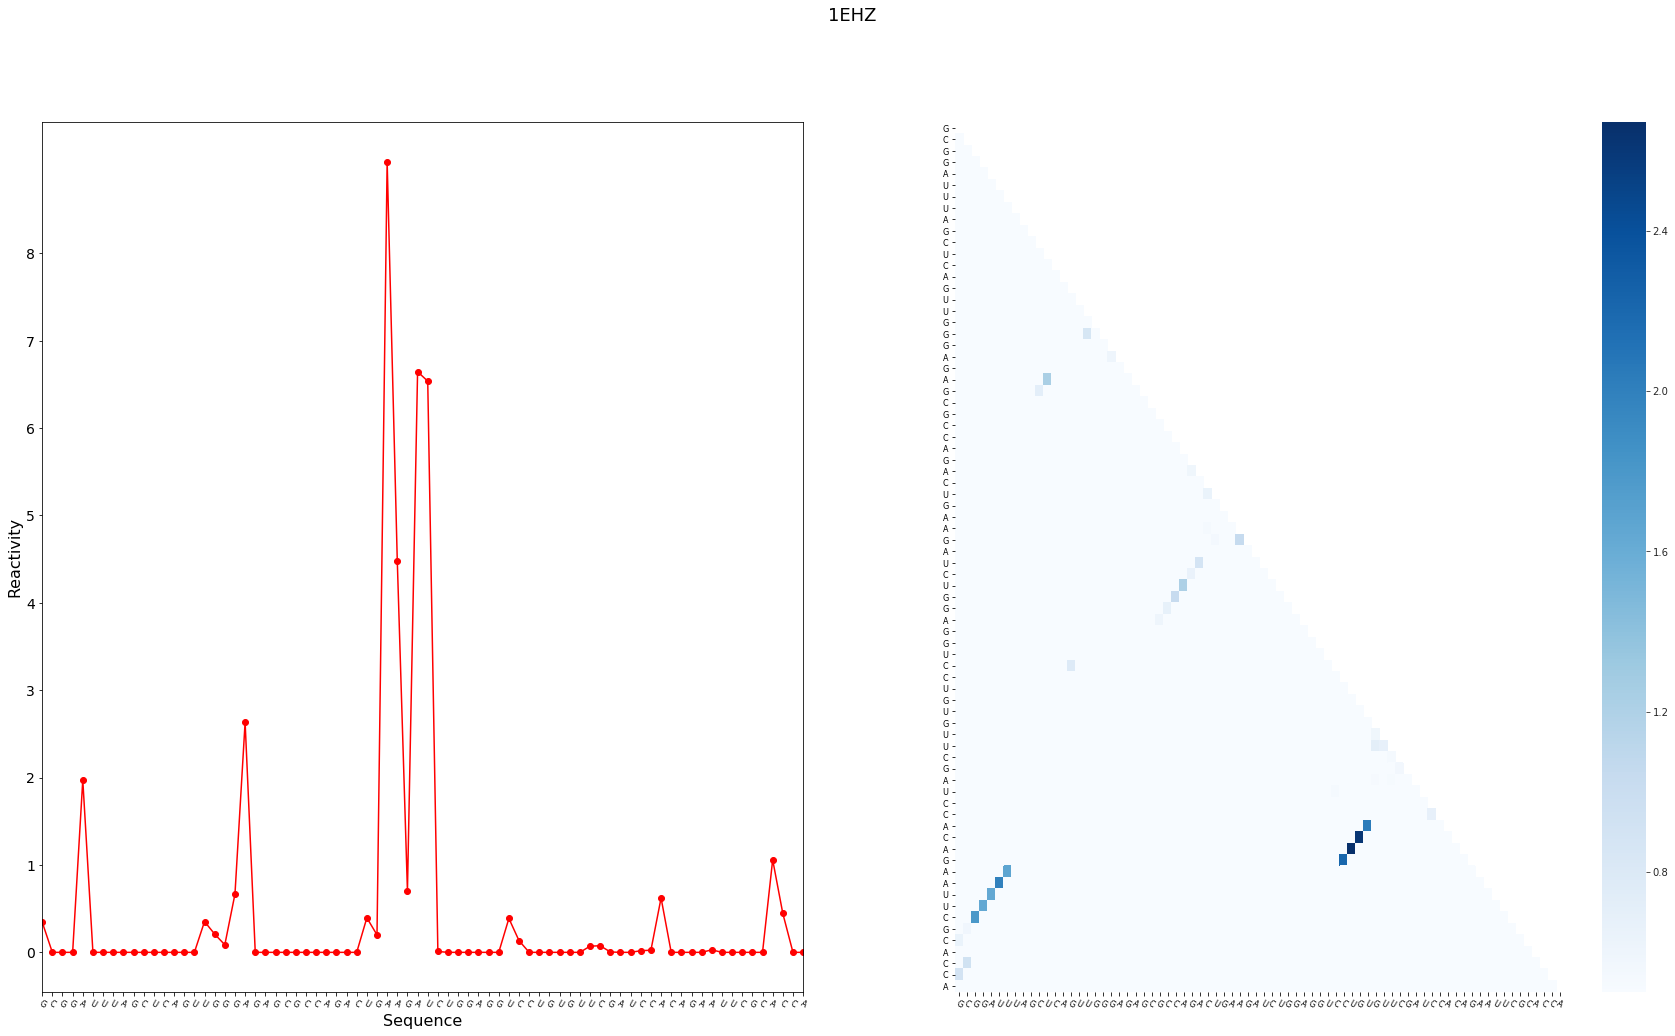

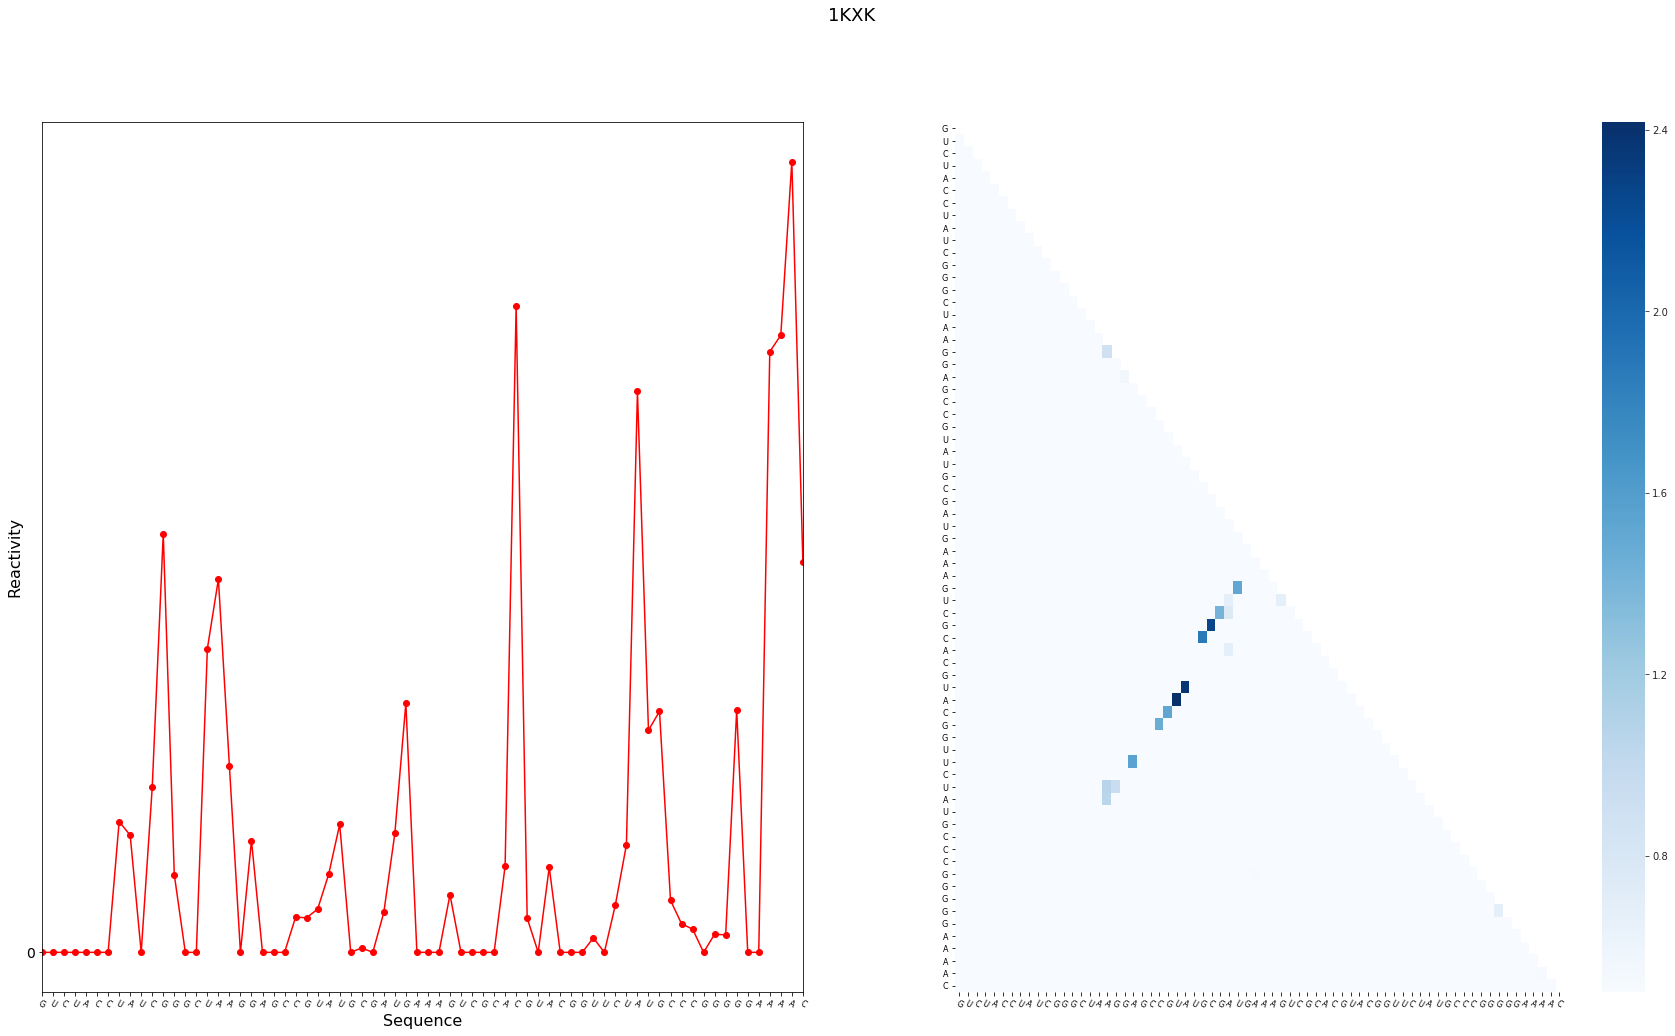

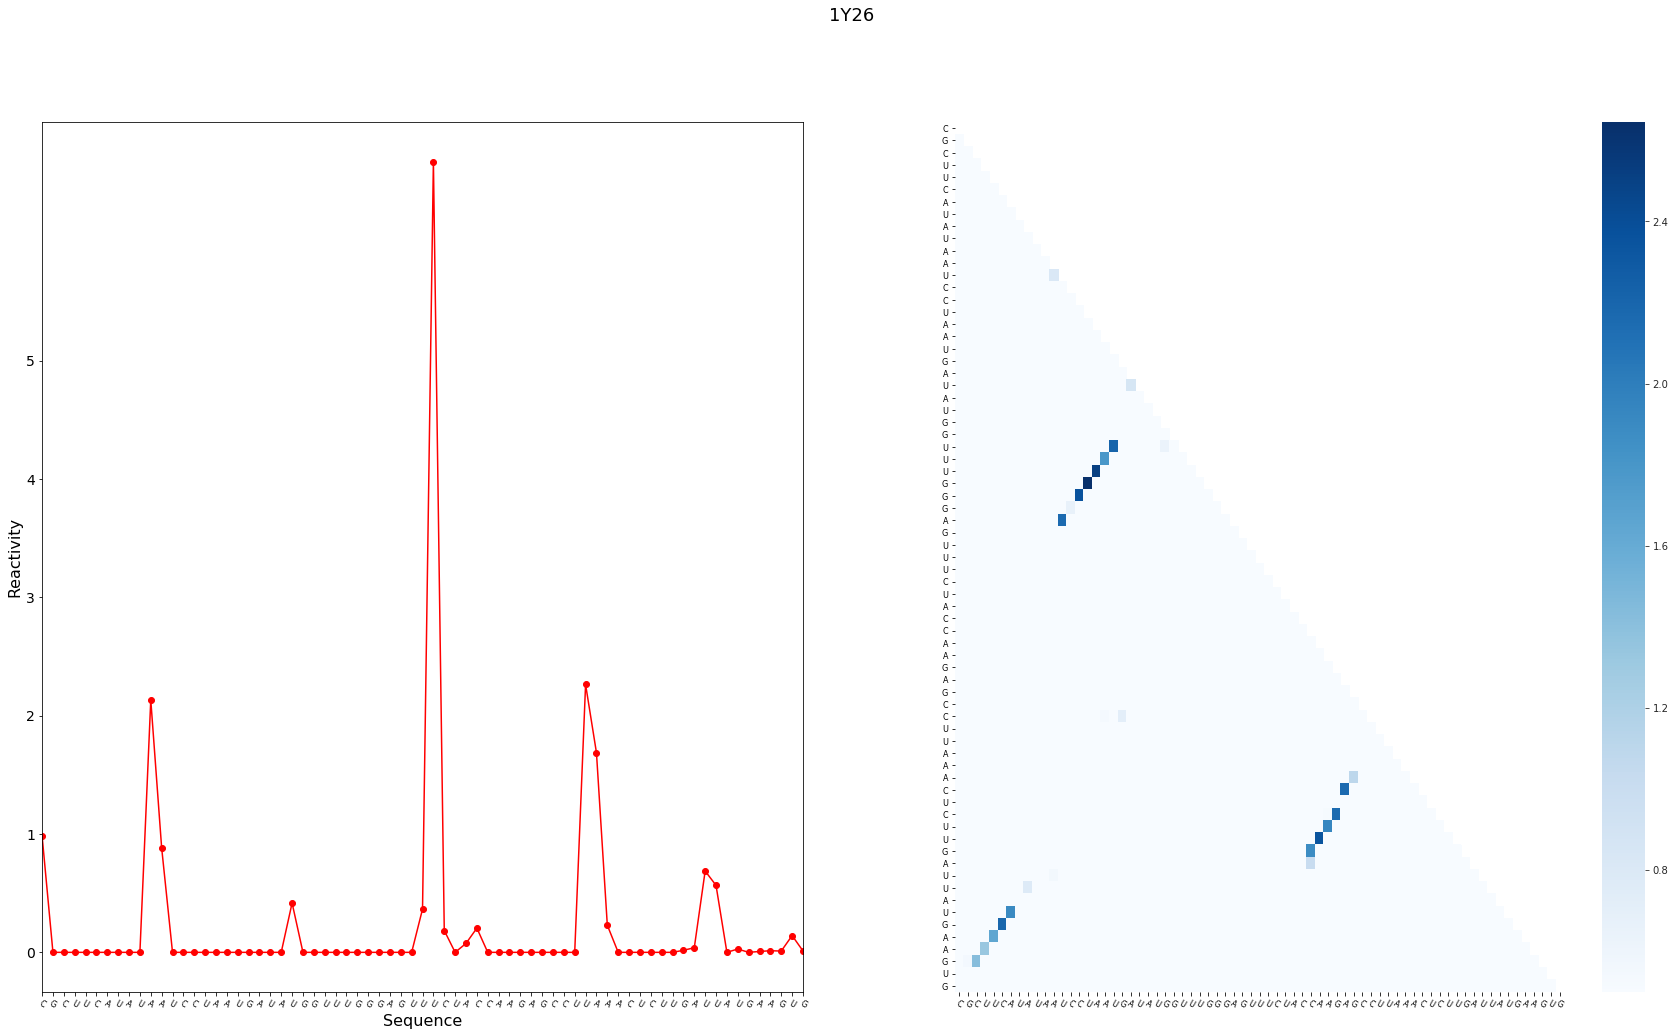

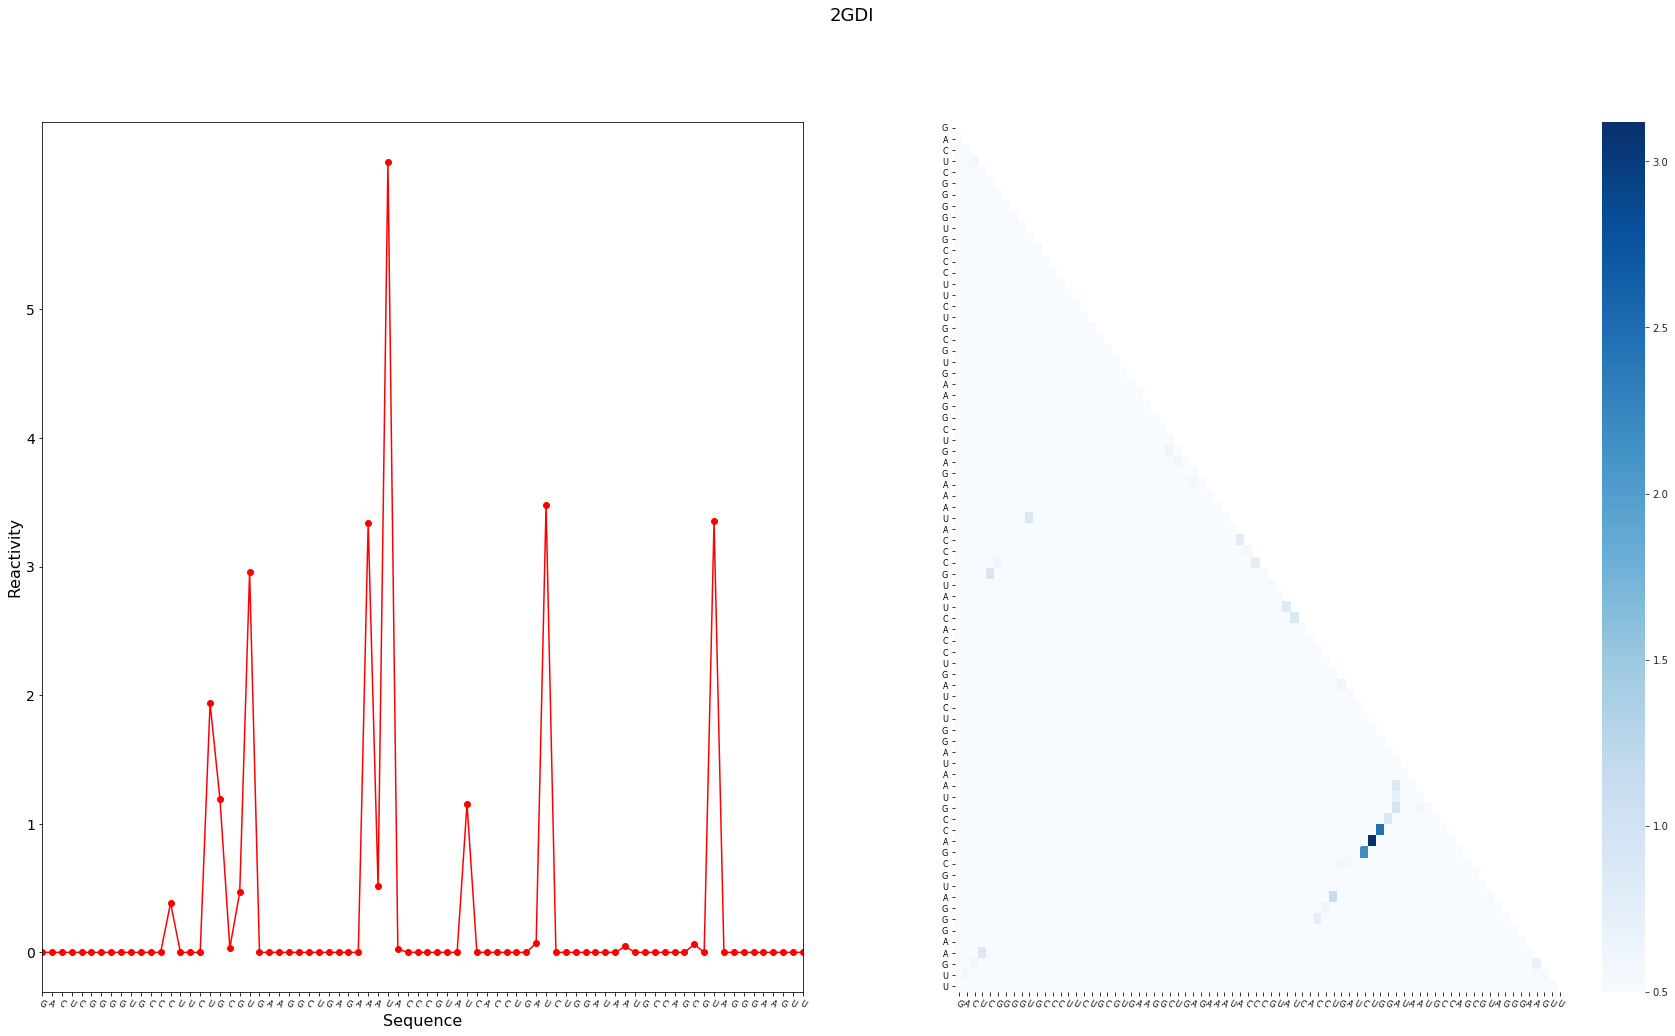

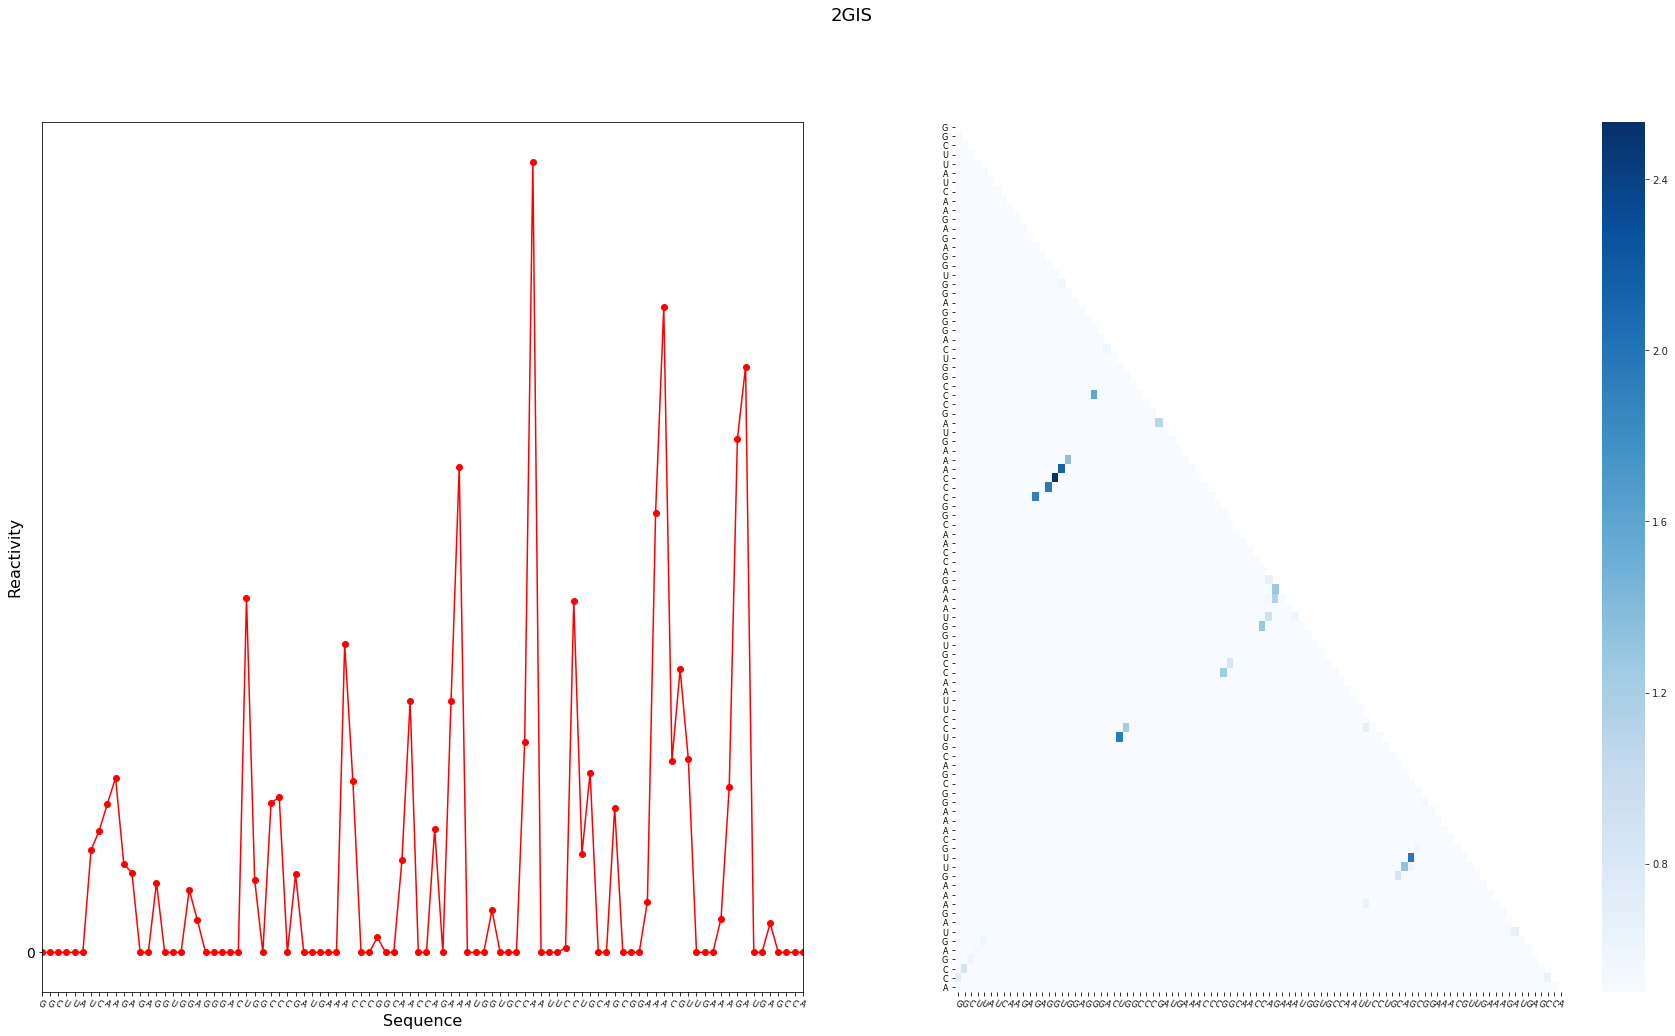

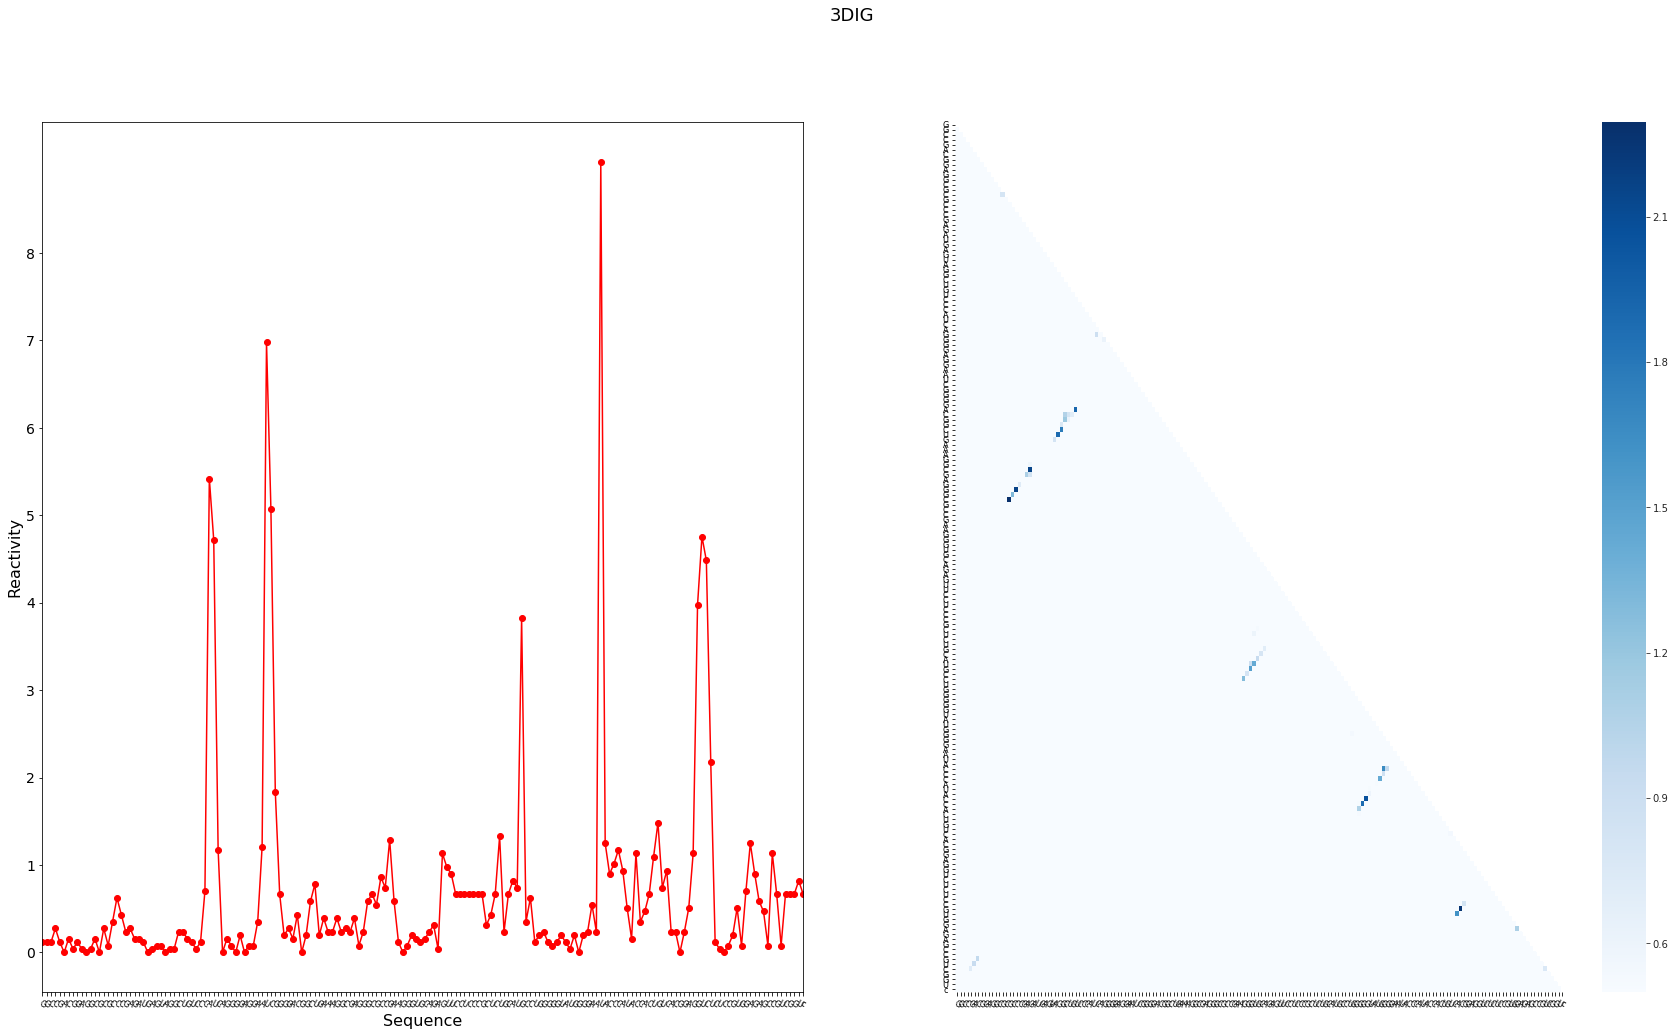

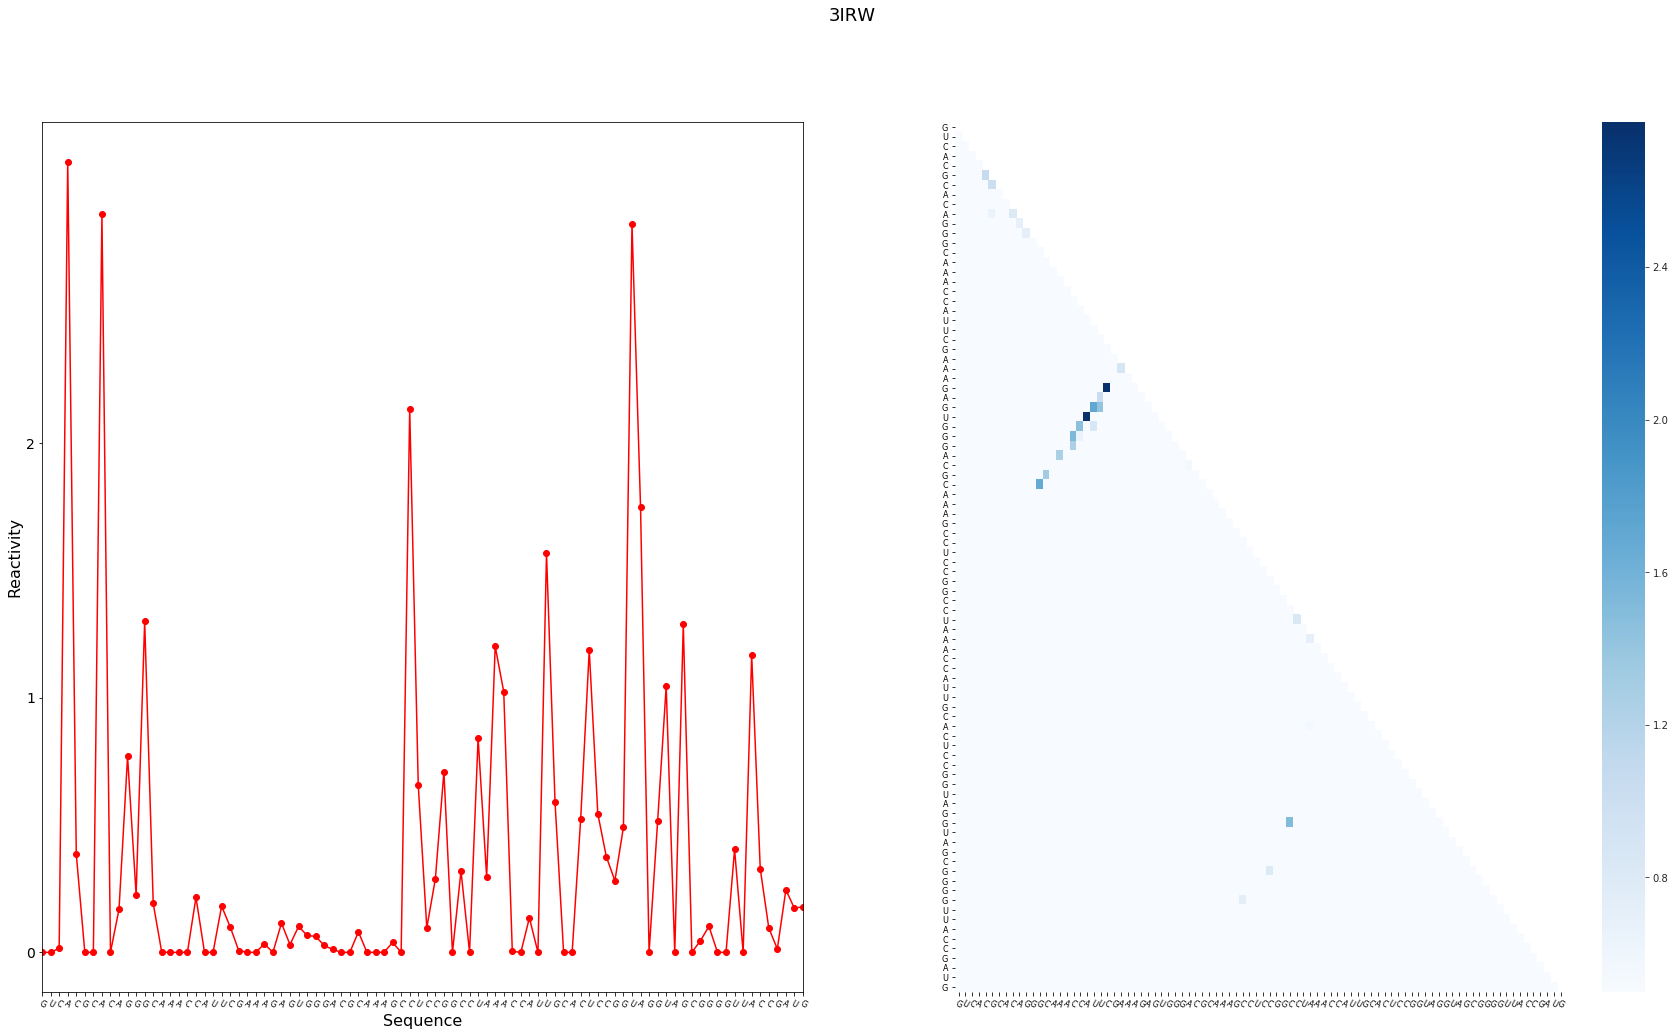

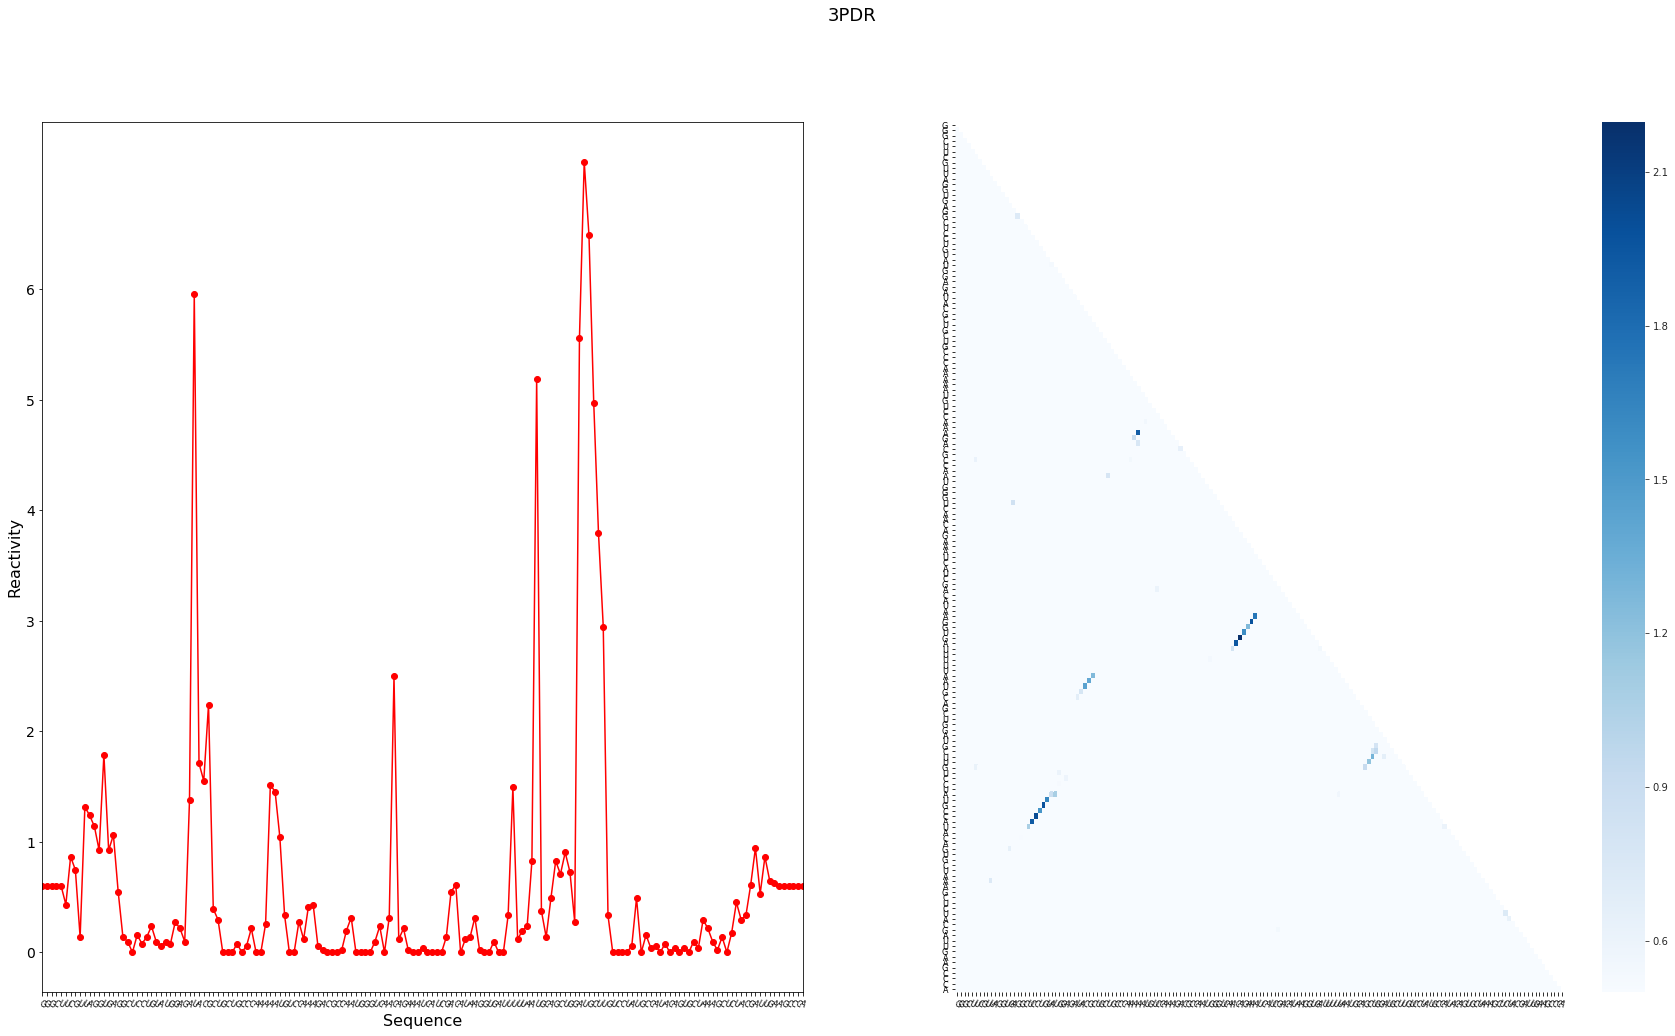

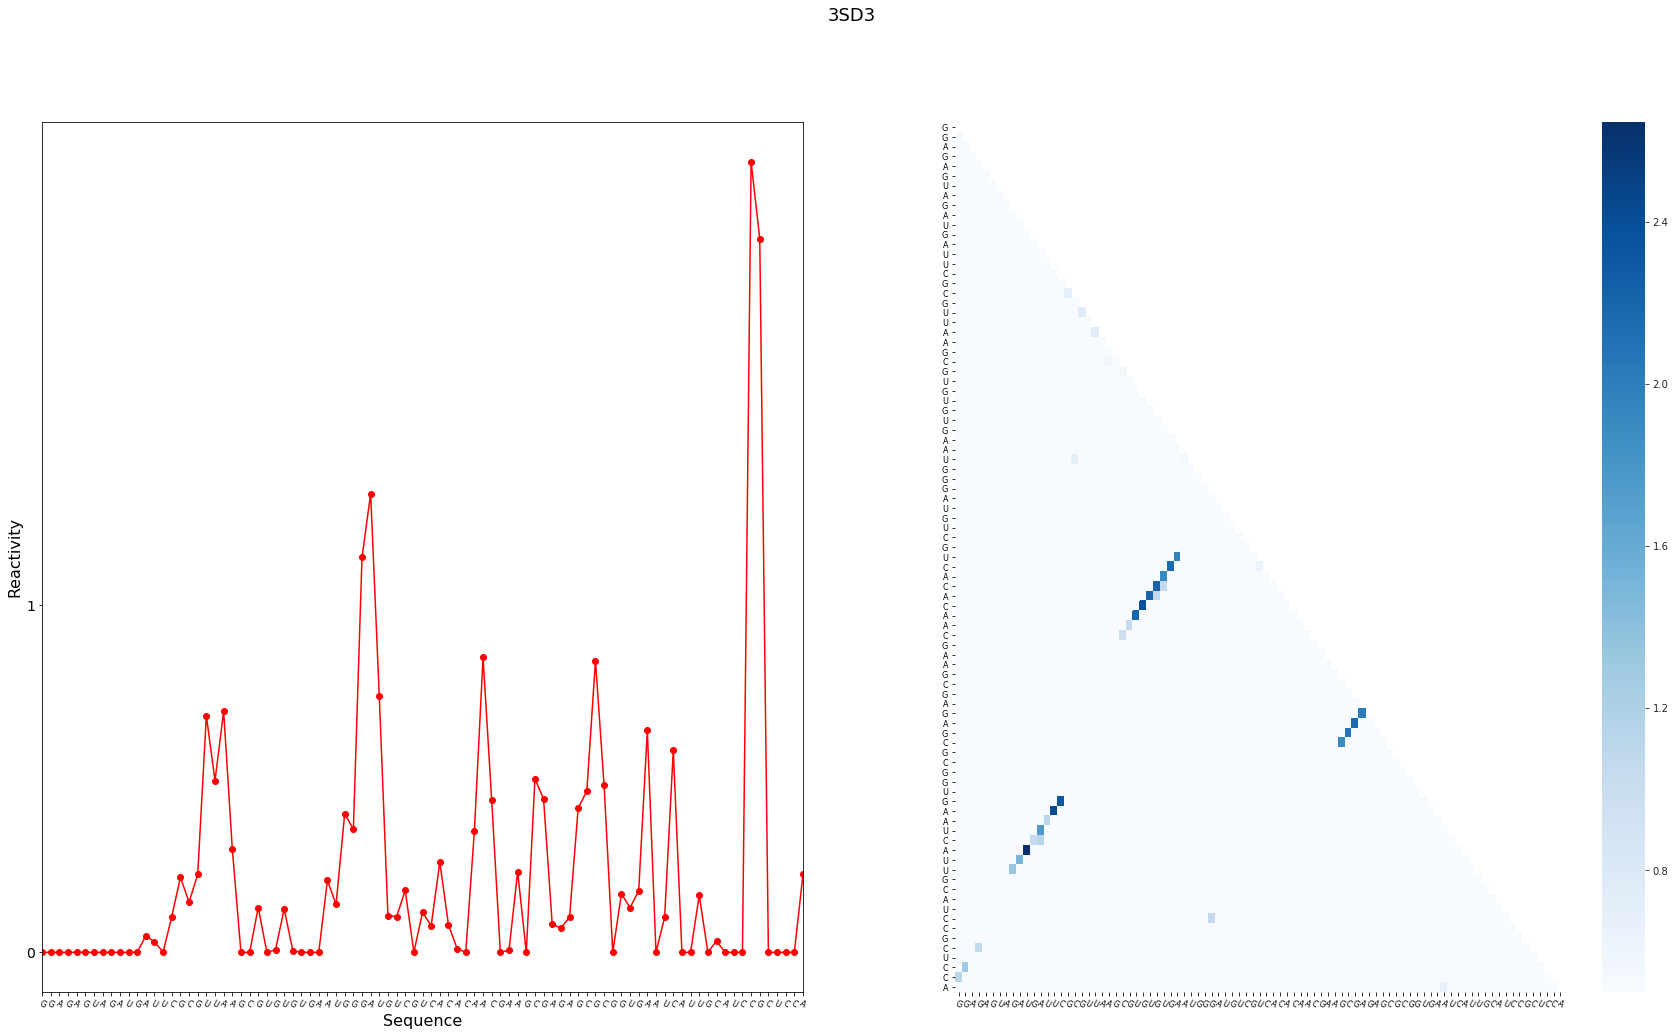

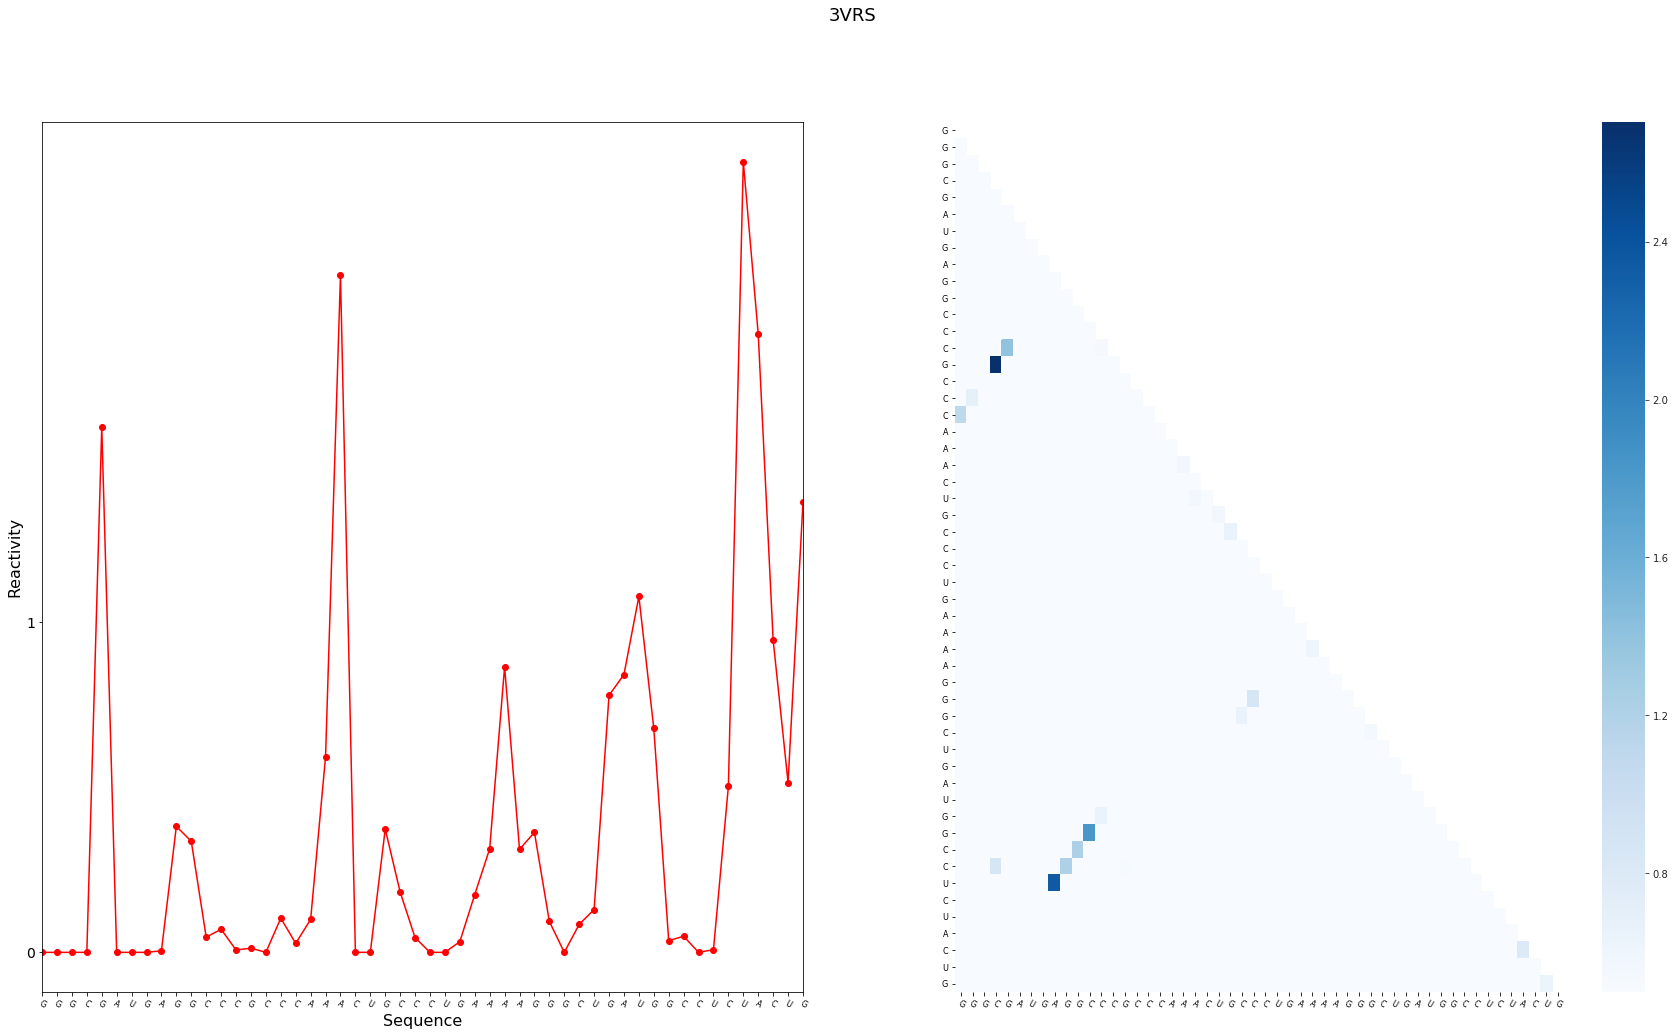

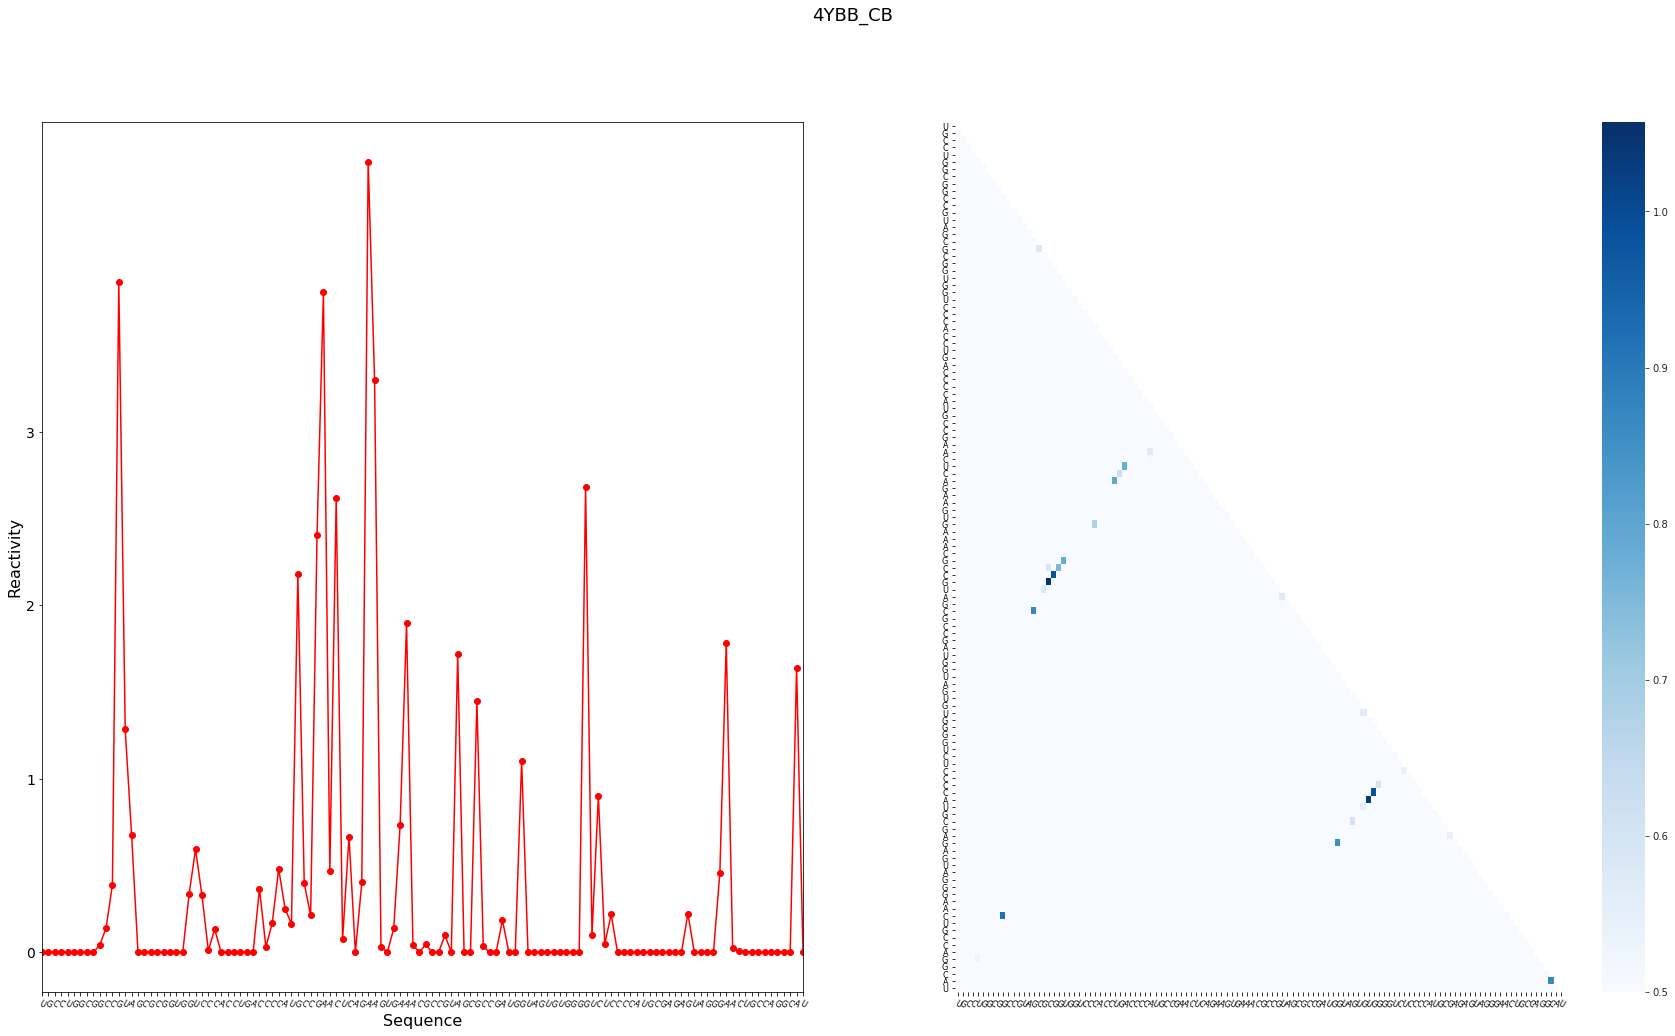

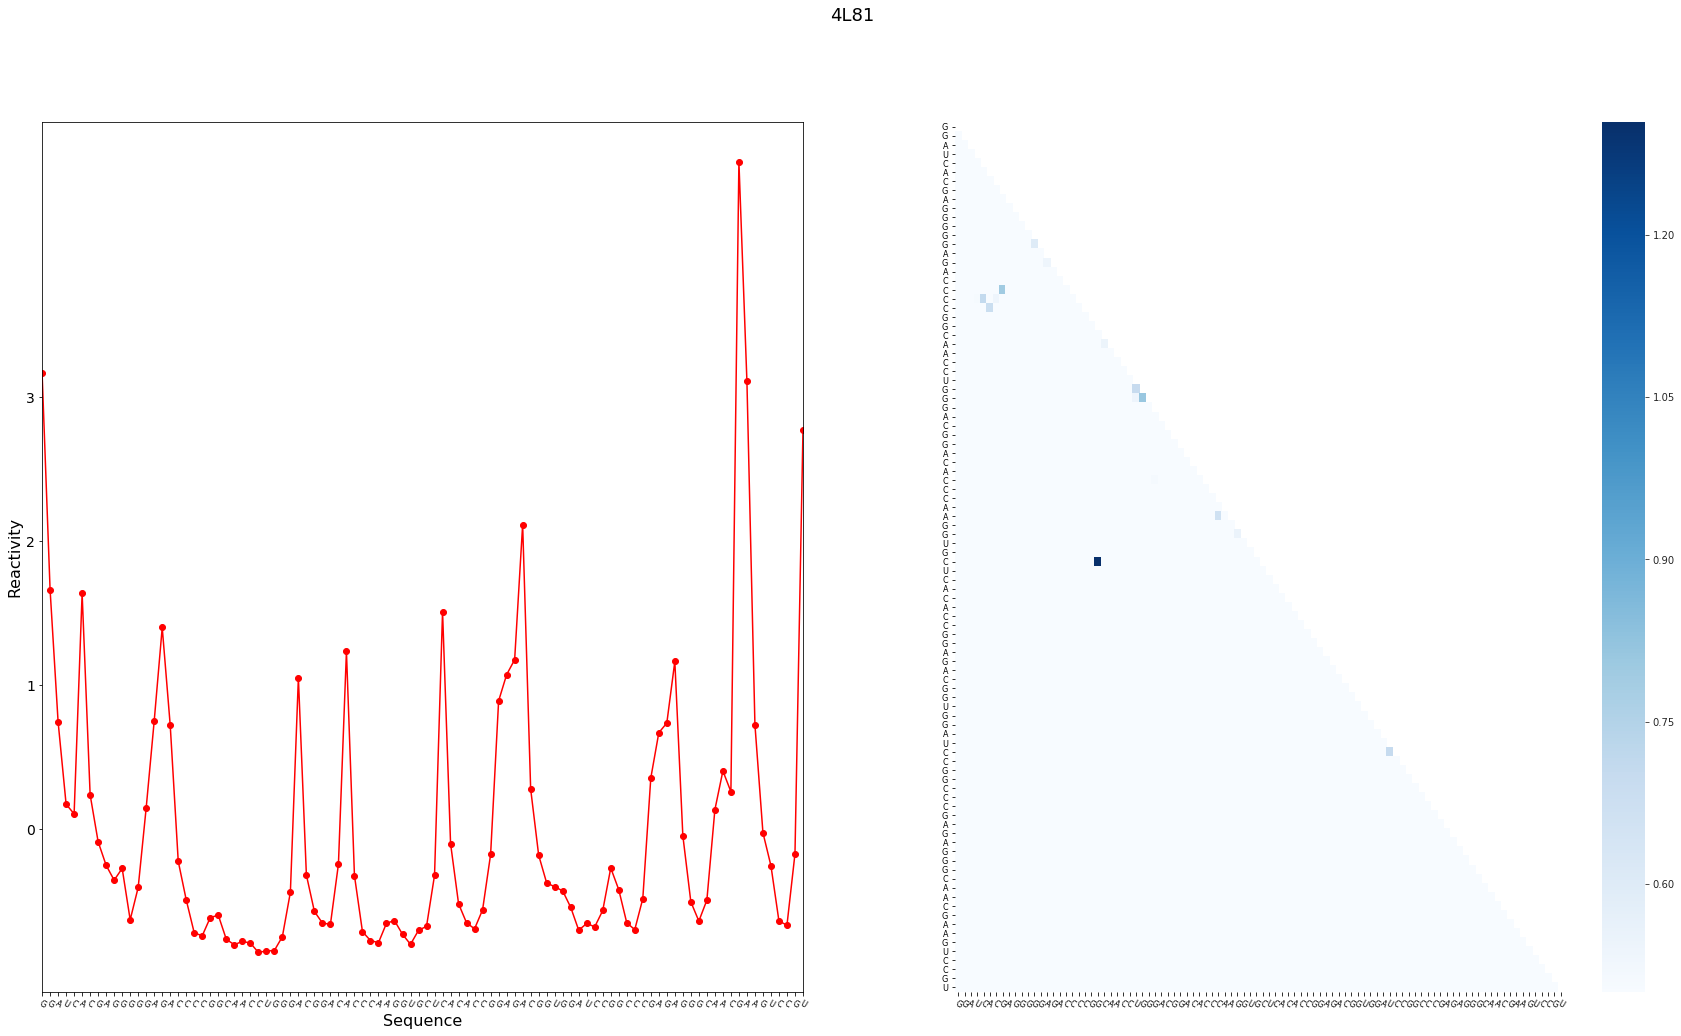

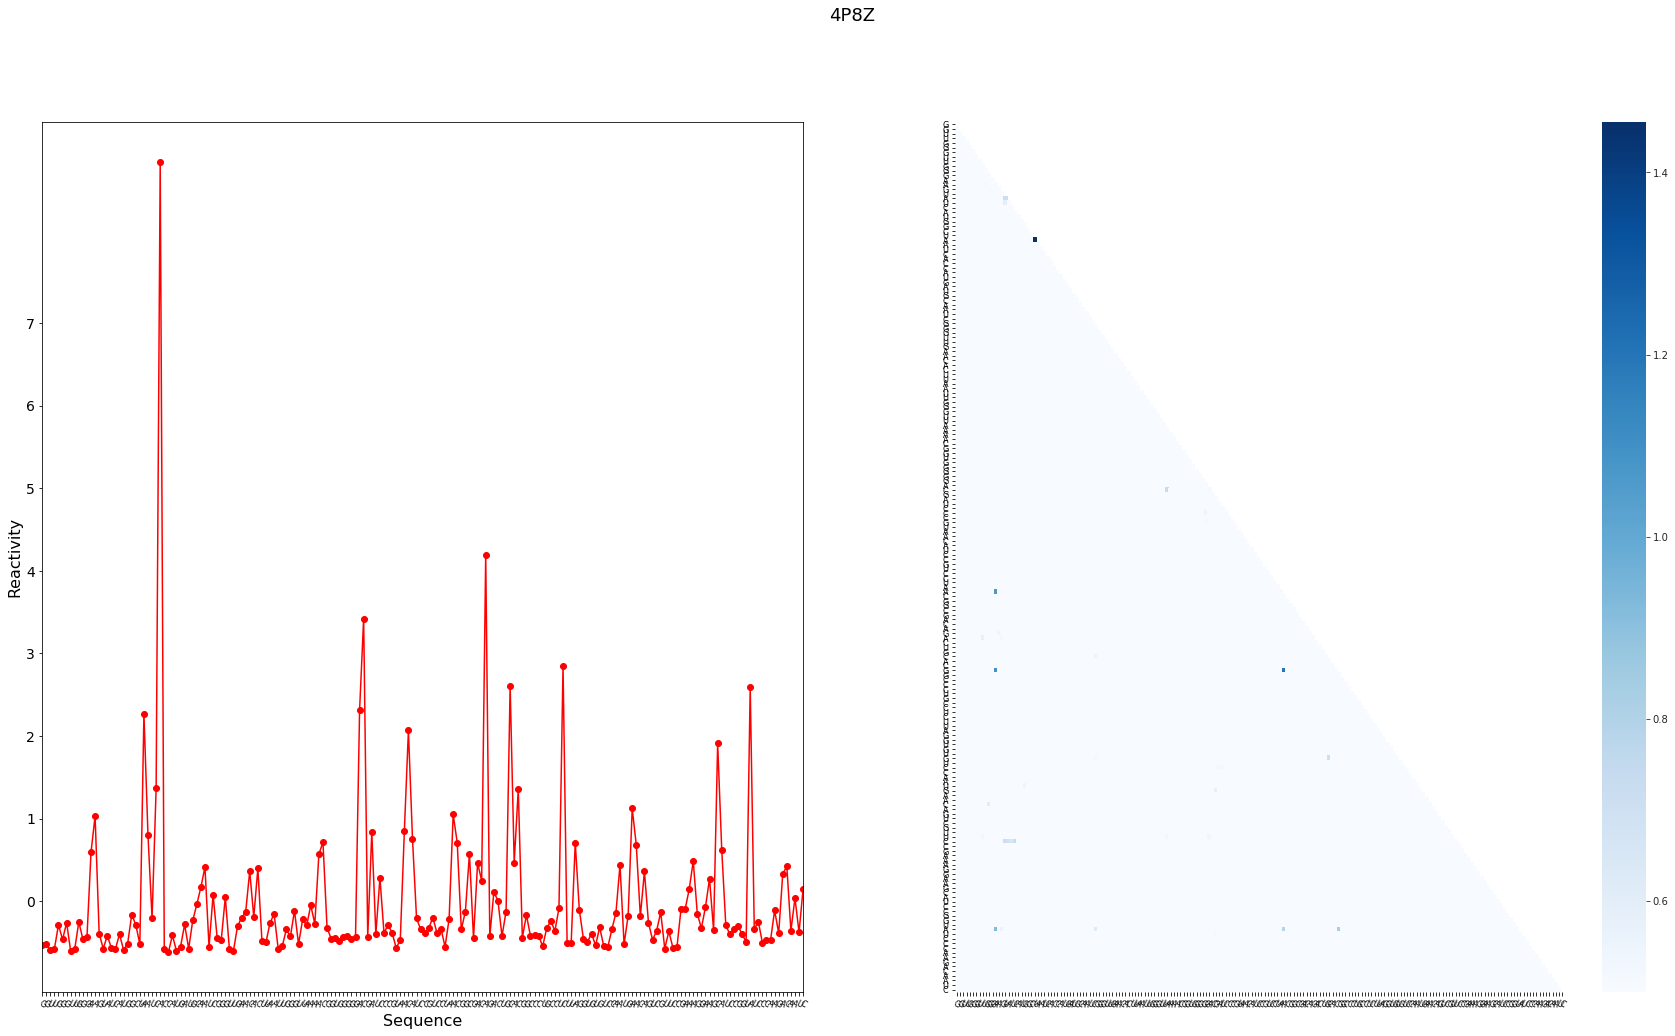

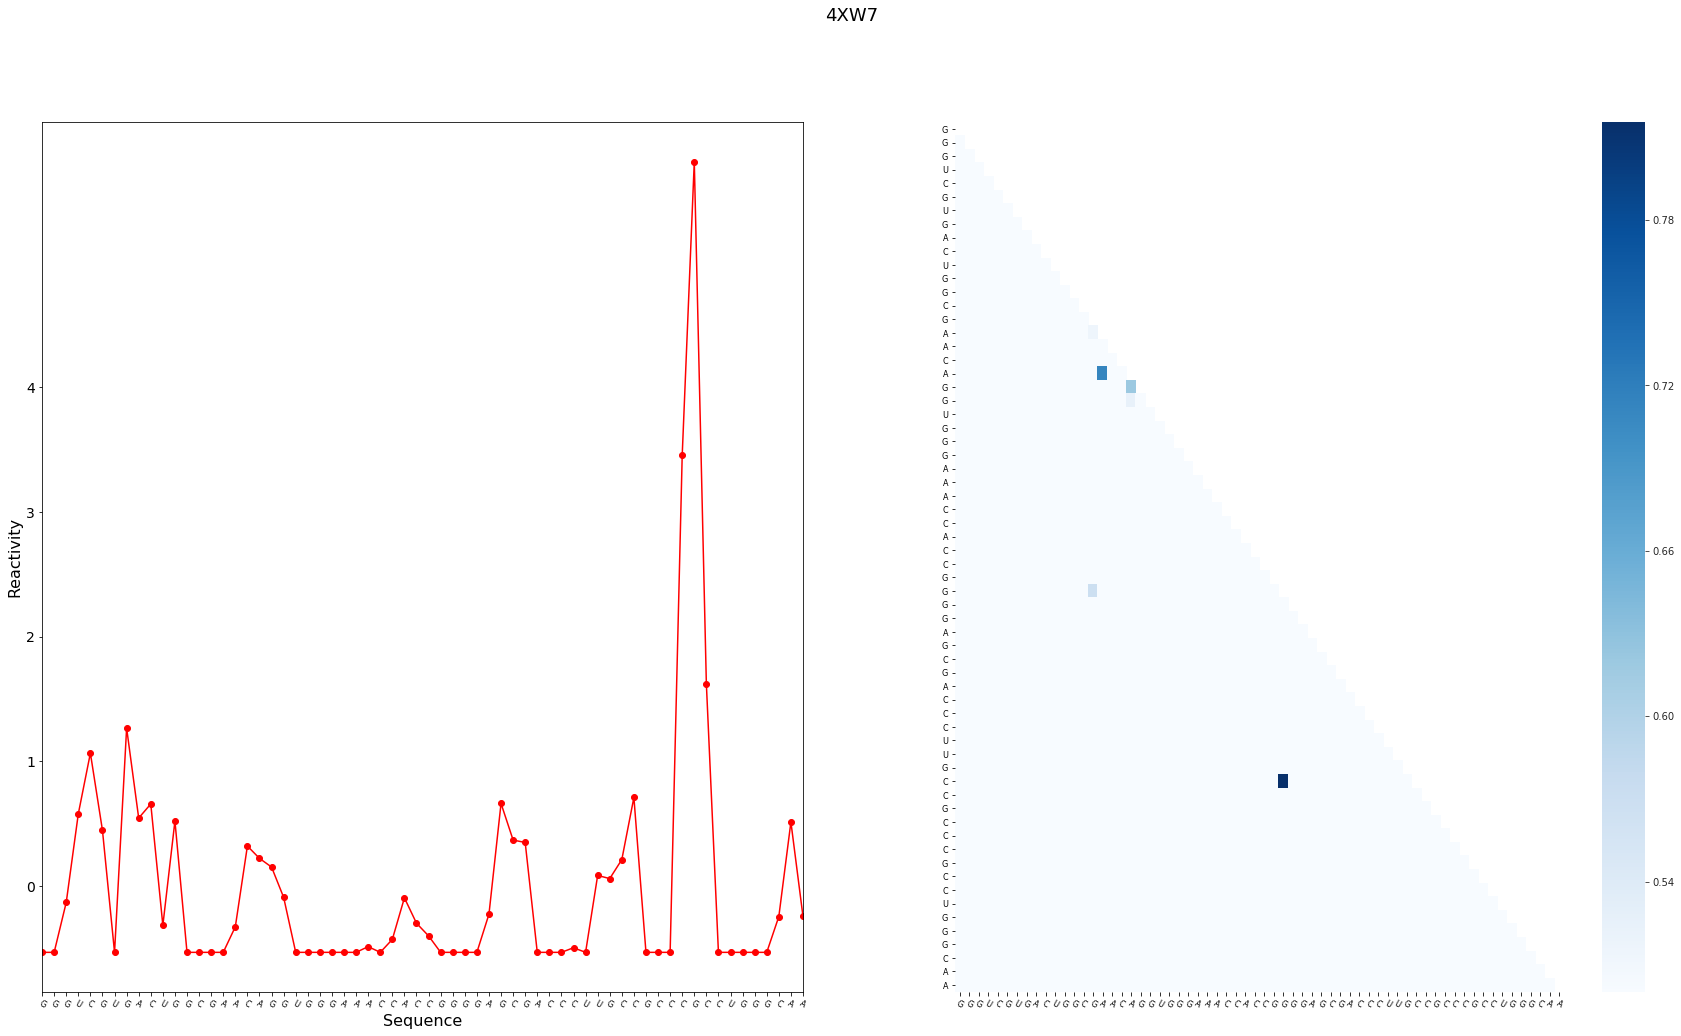

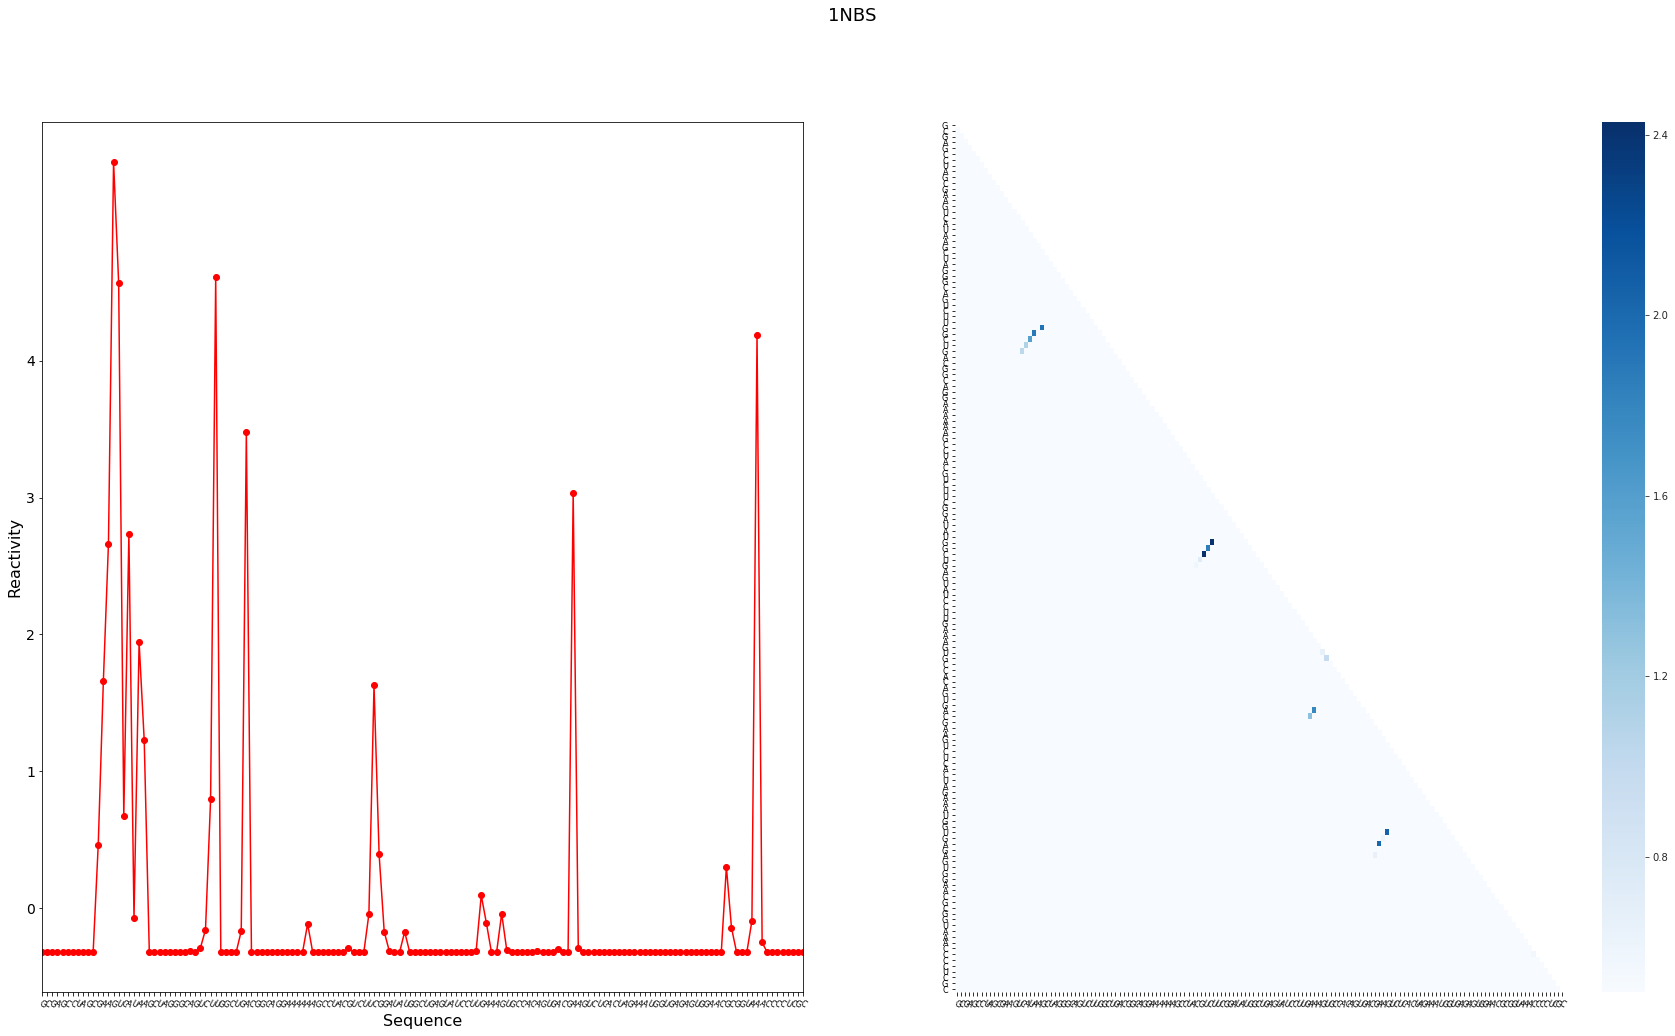

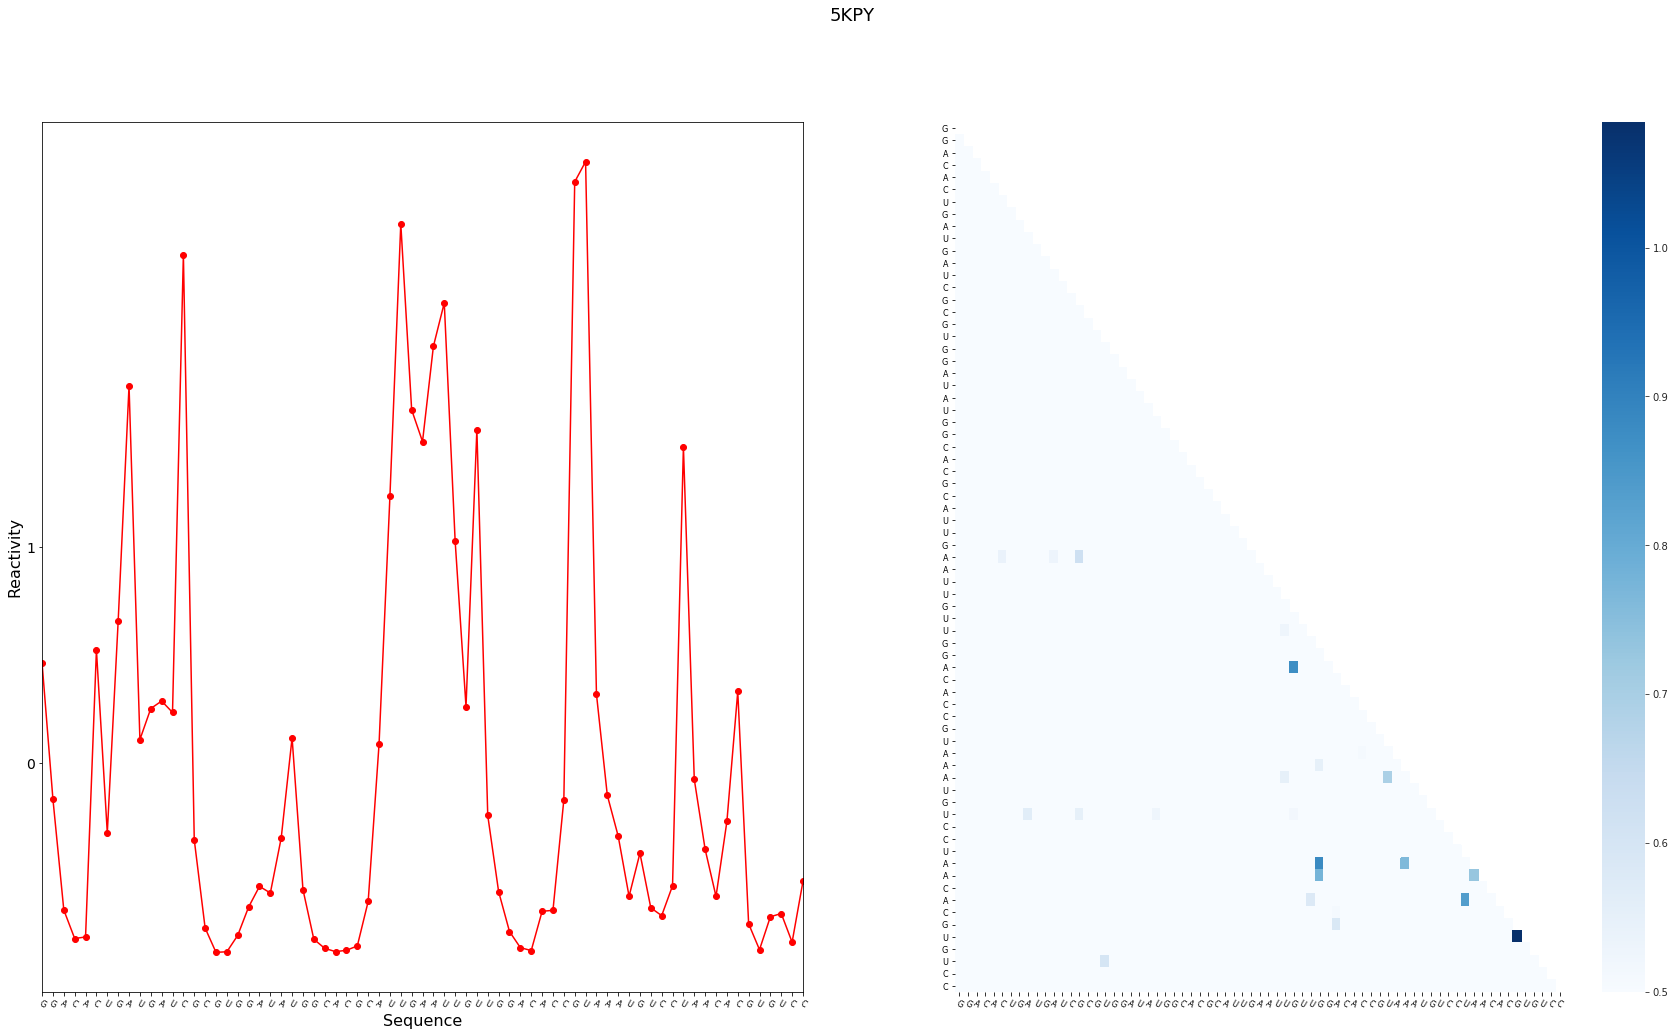

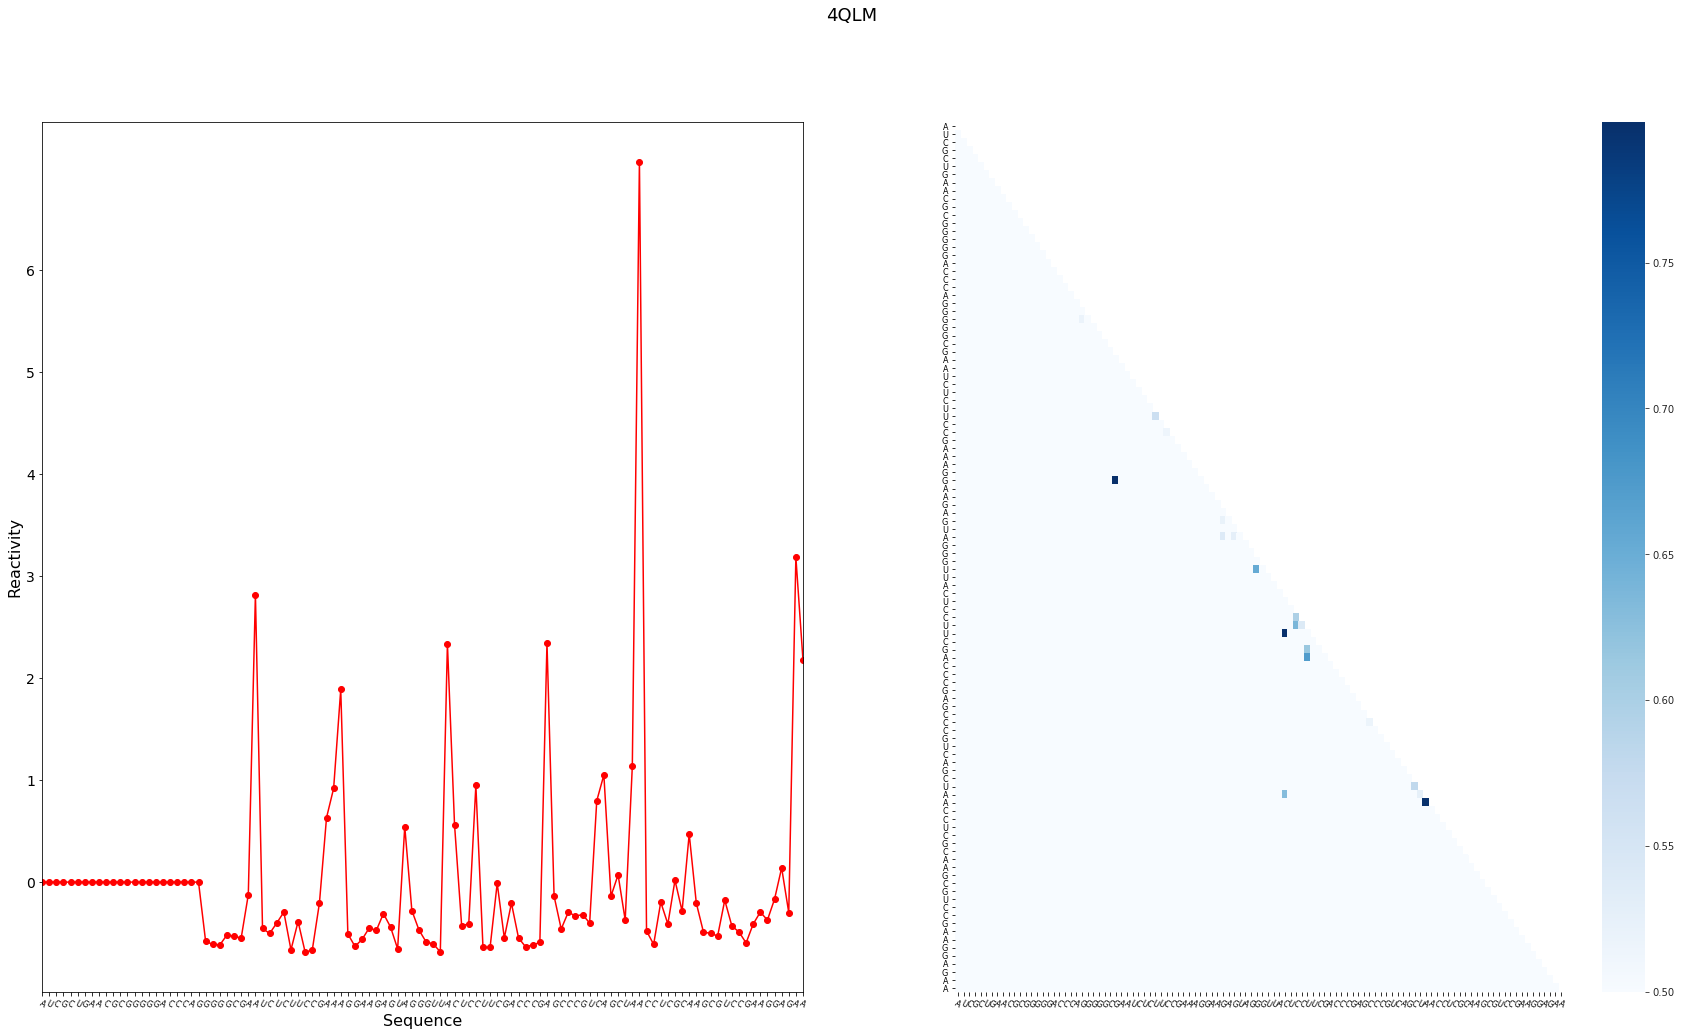

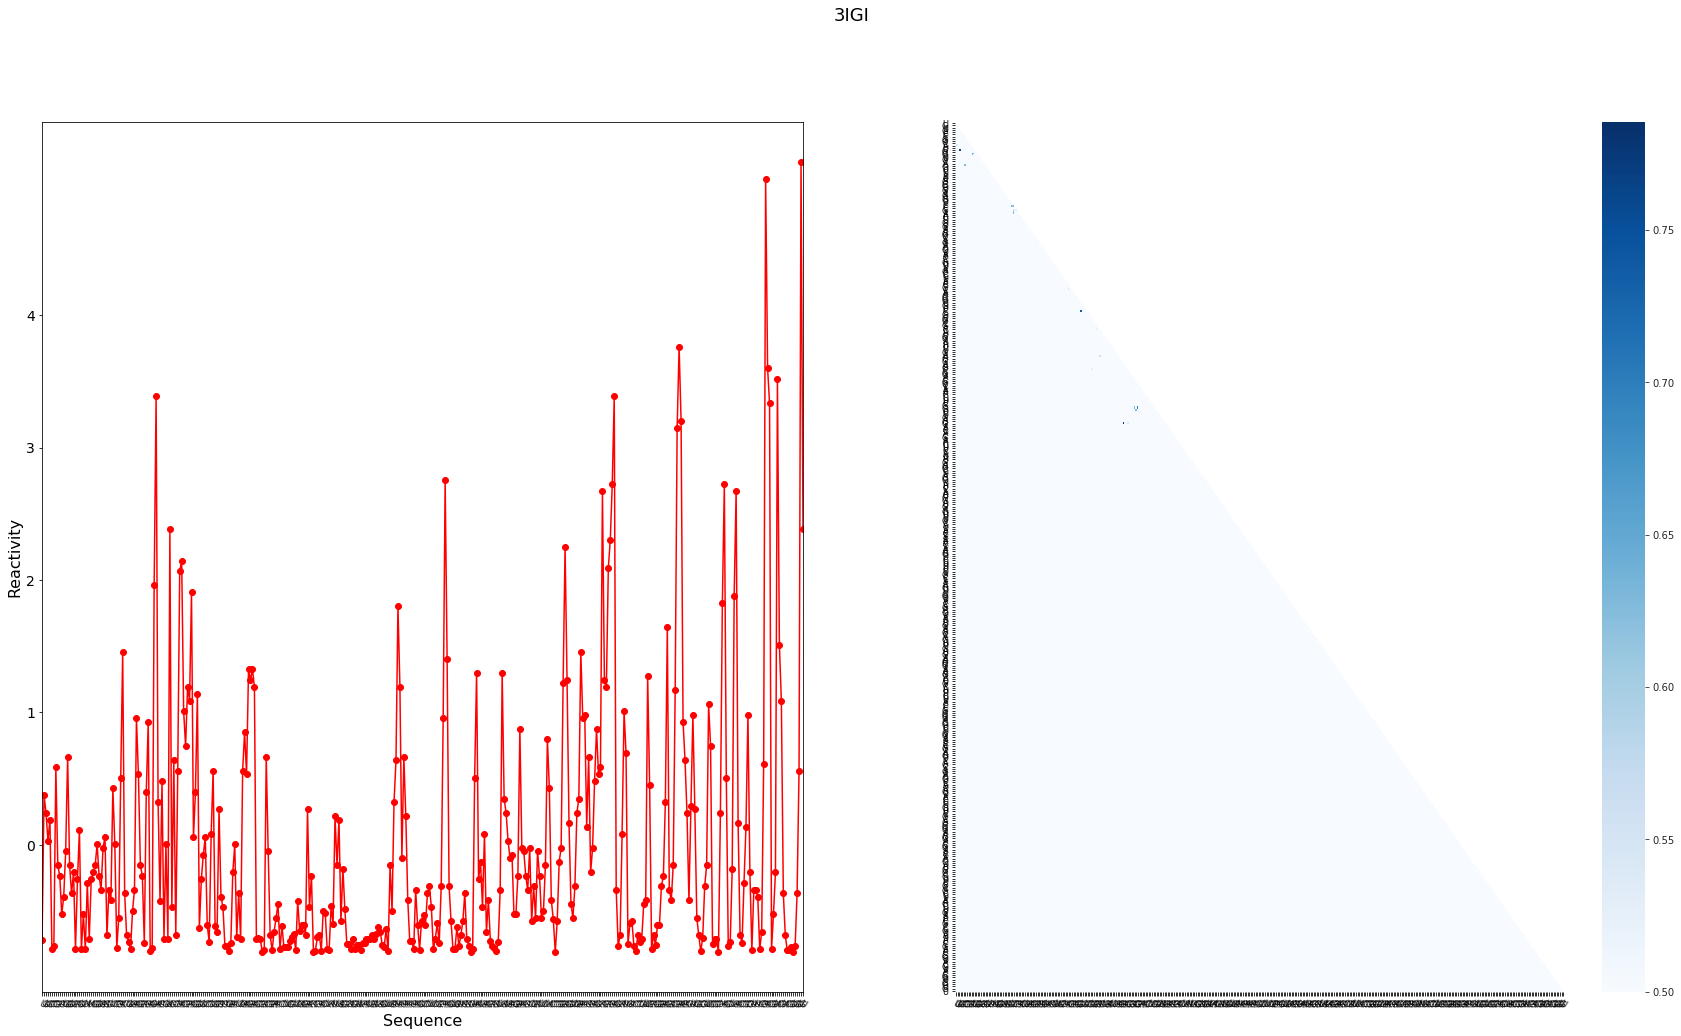

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
ds = pd.read_pickle('data.p')
for mol in ds.pdb.values:
    seq = ds[ds.pdb==mol].seq.values[0]
    stru = ds[ds.pdb==mol].stru.values[0]
    dcam = ds[ds.pdb==mol].dca.values[0]
    R = ds[ds.pdb==mol].norm_r.values[0]

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30,16))
    plt.subplots_adjust(wspace=0.2, hspace=0)
    fig.suptitle(mol, fontsize=18)
    ax1.plot(R, 'ro-')
    ax1.set_ylabel('Reactivity', fontsize=16)
    ax1.set_yticks(np.arange(int(np.min(R)), int(np.max(R))))
    ax1.set_yticklabels(list(np.arange(int(np.min(R)), int(np.max(R)))), fontsize=14)

    ax1.set_xlim((0,len(seq)-1))
    ax1.set_xlabel('Sequence', fontsize=16)
    ax1.set_xticks(range(len(seq)))
    ax1.set_xticklabels(seq, fontsize=8, rotation=-30)
    ax1.set_aspect('auto')
    cmap = 'Blues'
    mask = np.zeros_like(dcam)
    mask[np.triu_indices_from(mask)] = True
    with sns.axes_style("white"):
        ax2 = sns.heatmap(dcam.T, mask=mask,  xticklabels=seq, 
                         yticklabels=seq, cmap = cmap,vmin=.5 , vmax=np.max(dcam), square=True)
        plt.xticks(fontsize=8, rotation=-30)
        plt.yticks(fontsize=8, rotation=0)
        ax2.set_aspect('auto')

### S2.2 Reactivities and secondary structures
The color map to reactivity is:
- Green: low  
- Yellow: intermediate
- Red: high

s/1ehz


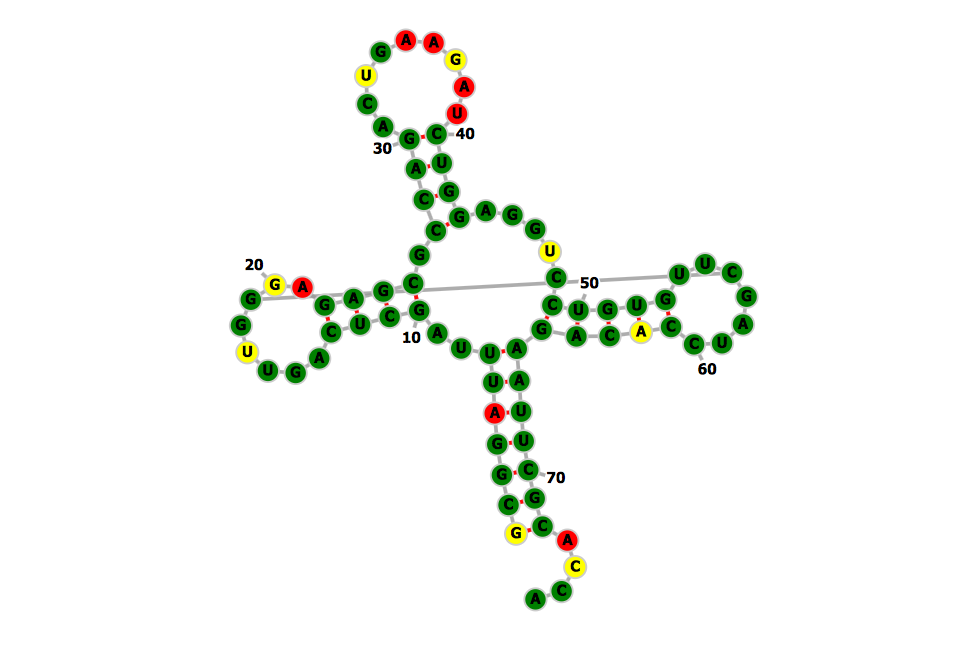

s/1kxk


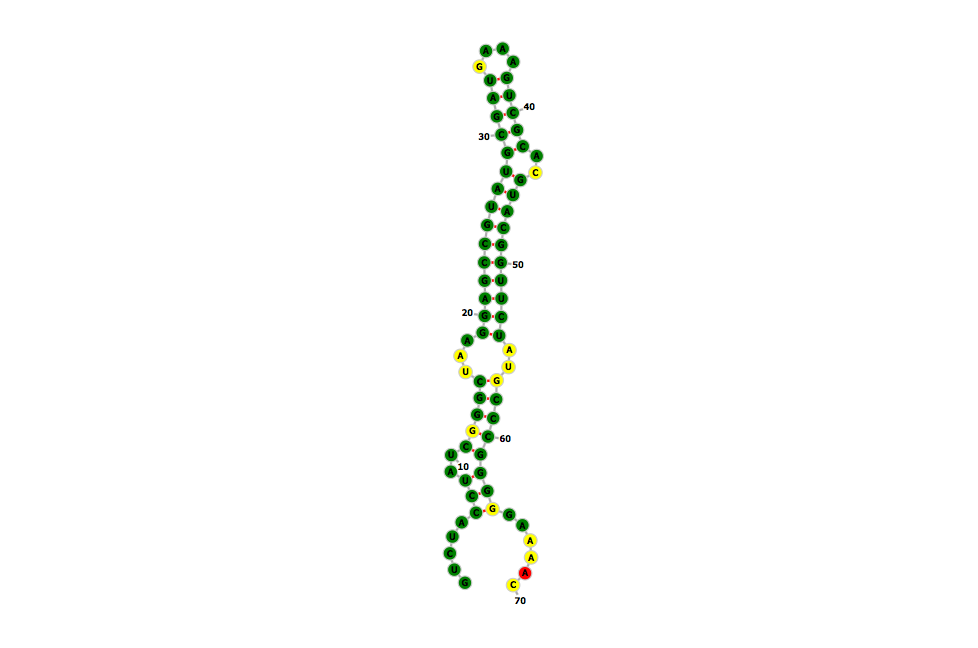

s/1nbs


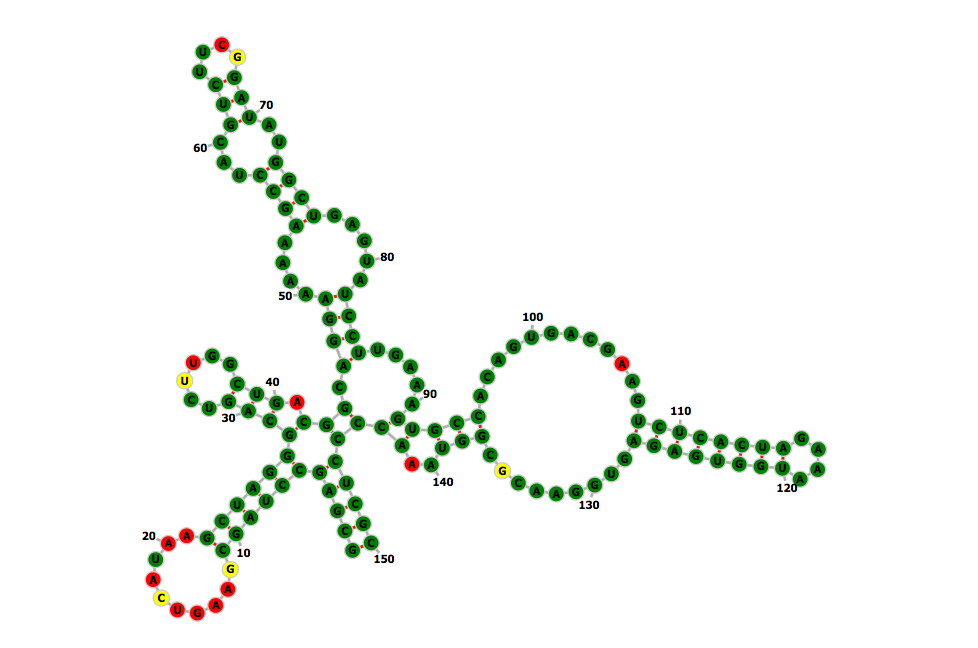

s/1y26


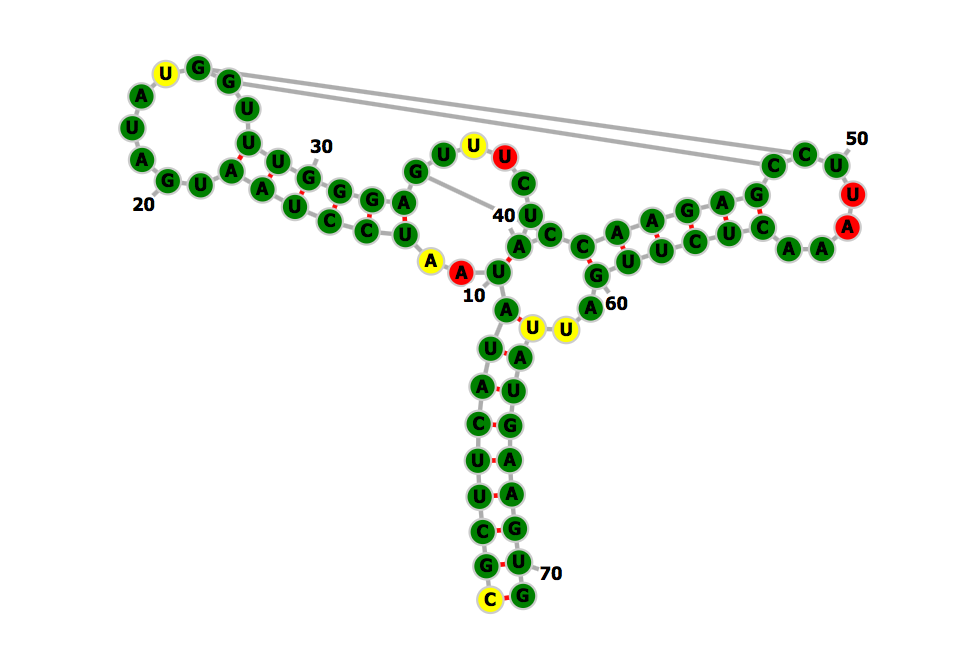

s/2gdi


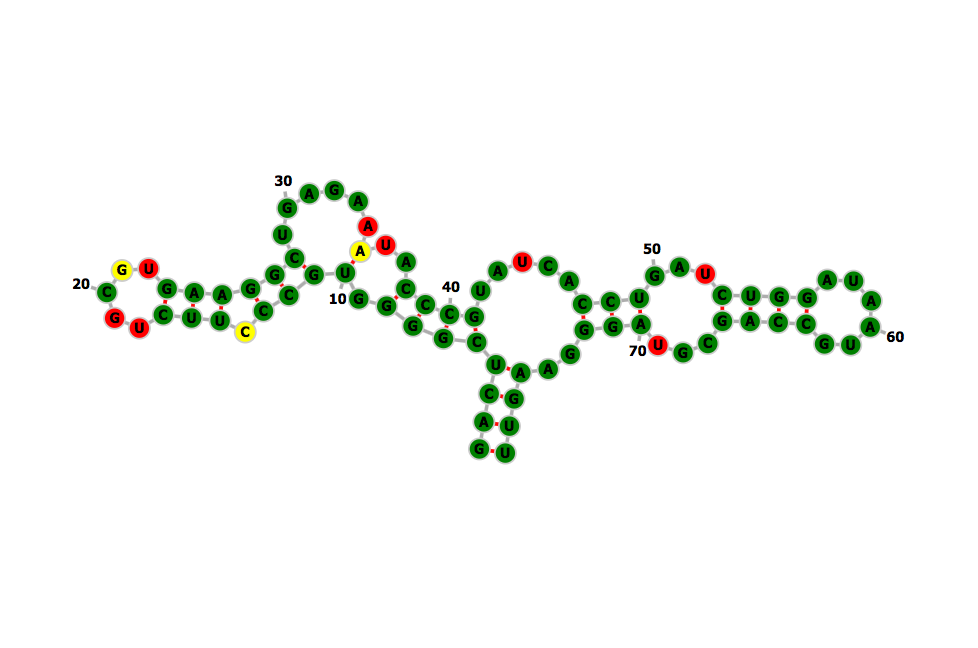

s/2gis


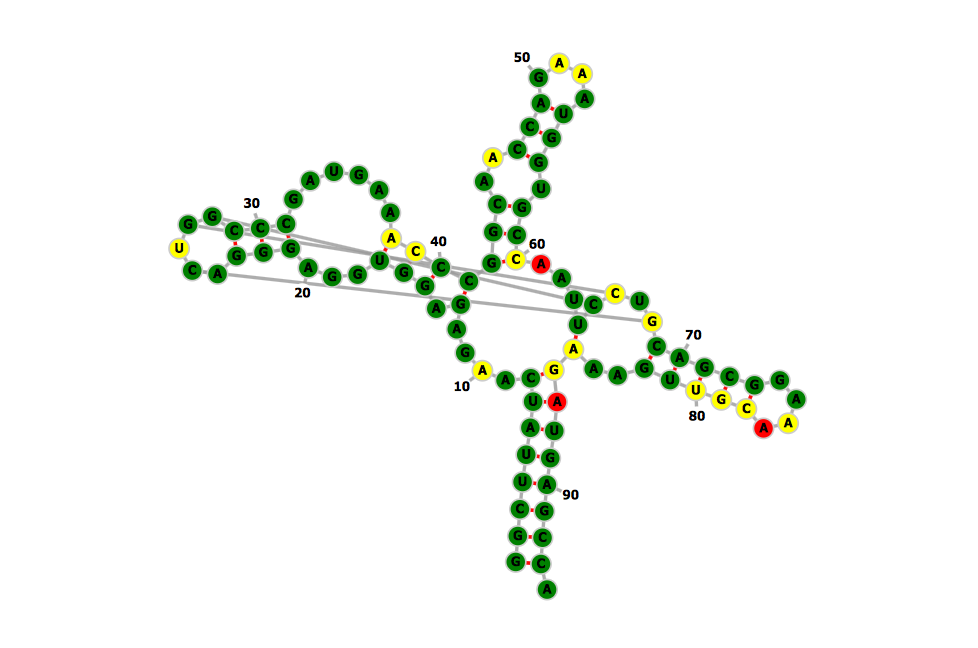

s/3dig


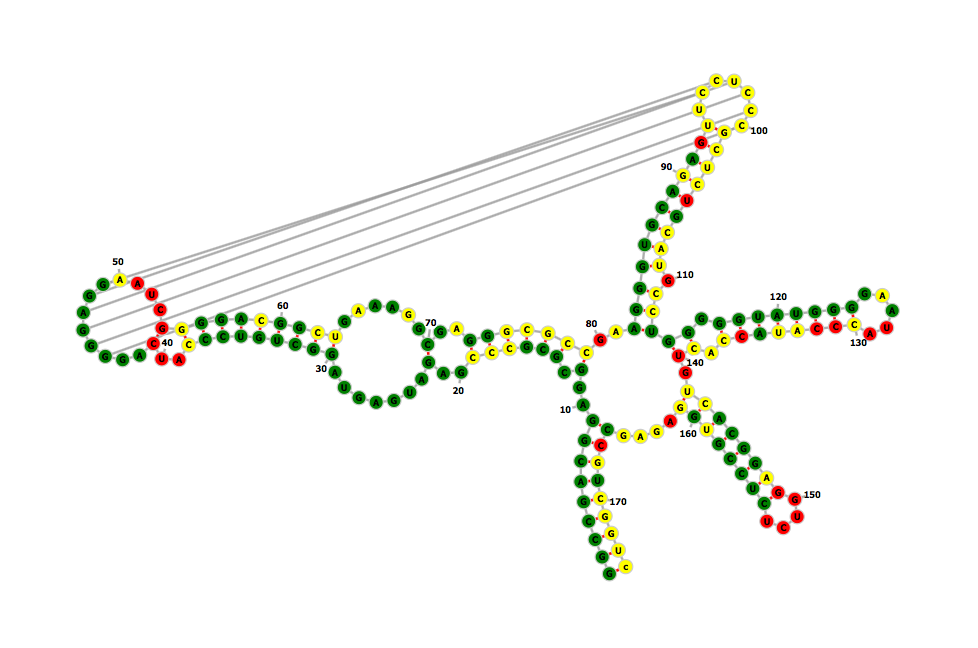

s/3igi


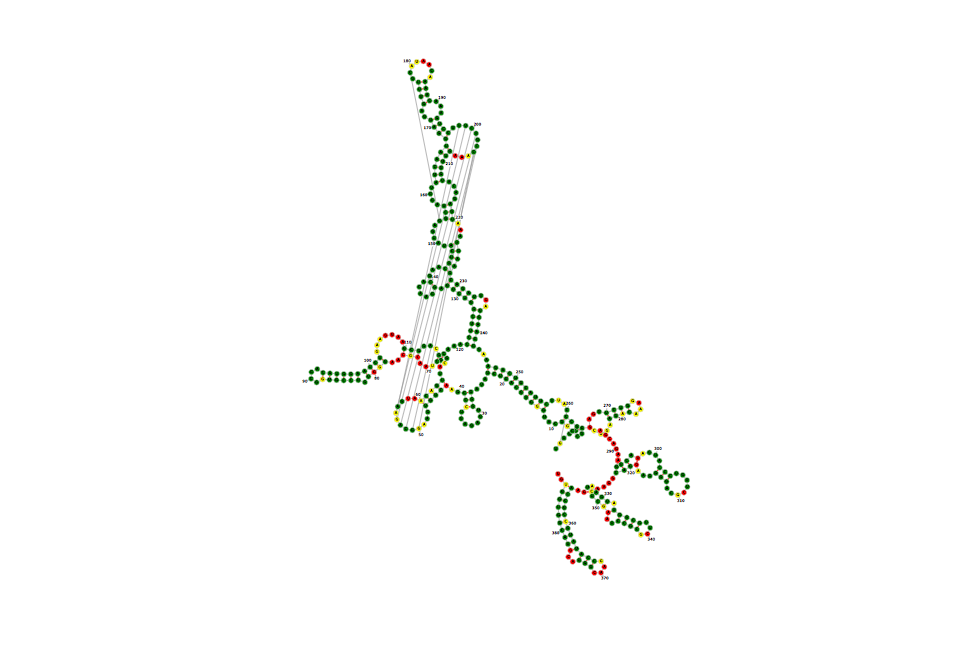

s/3irw


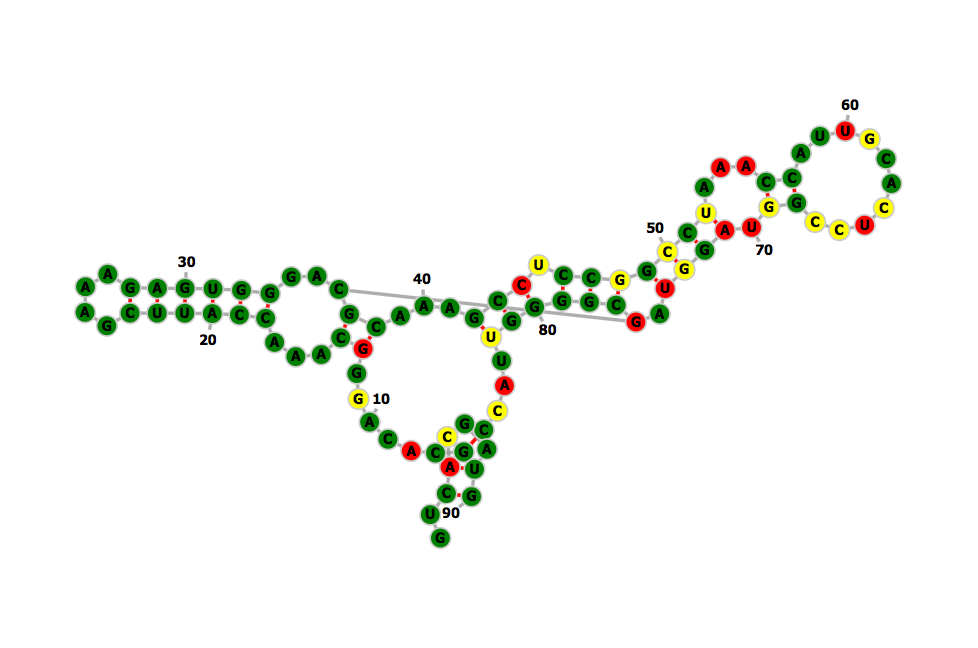

s/3pdr


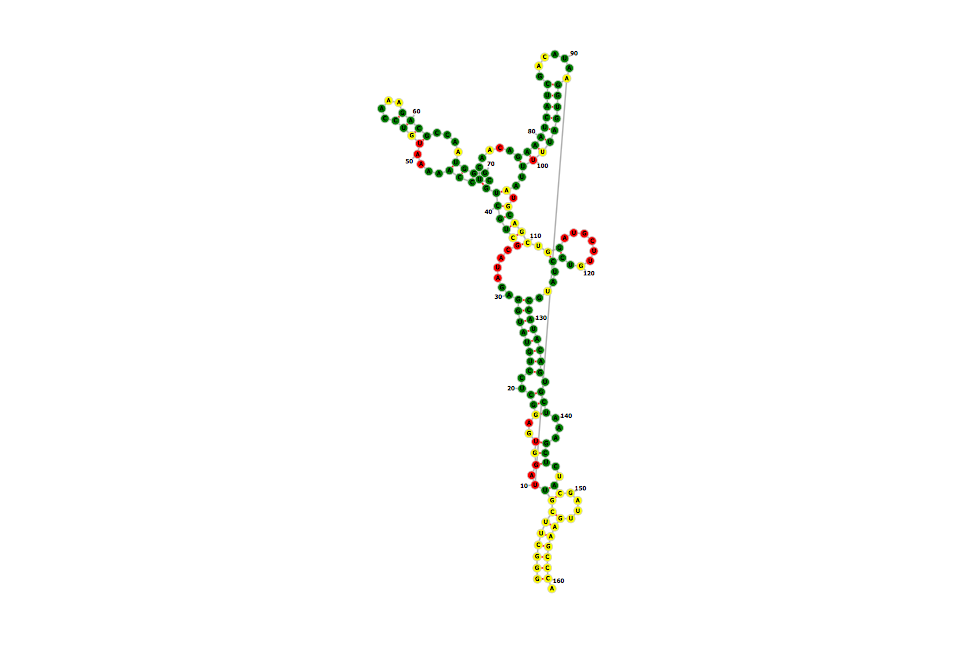

s/3sd3


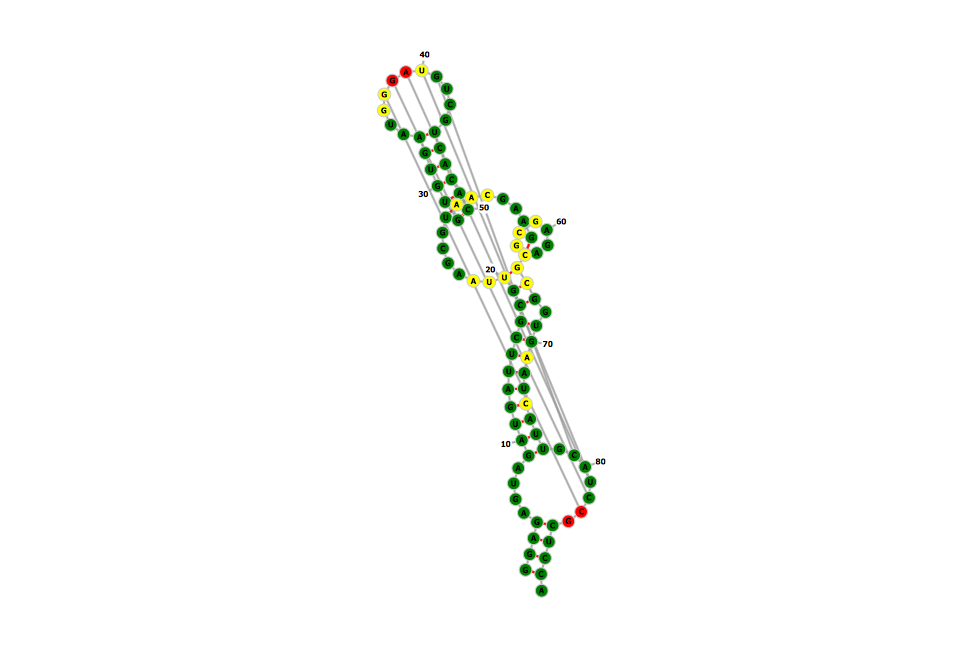

s/3vrs


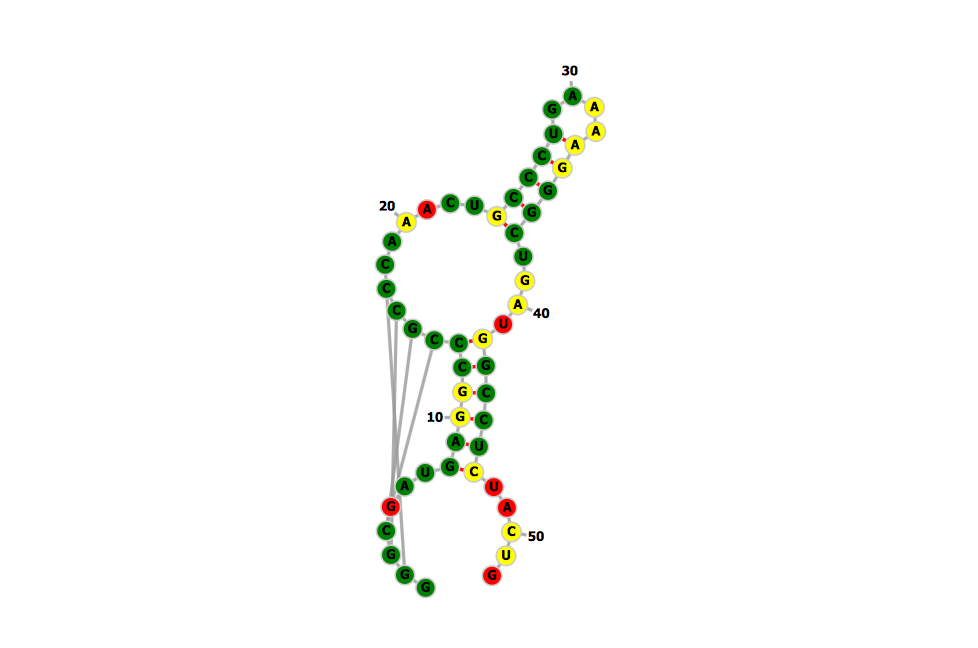

s/4l81


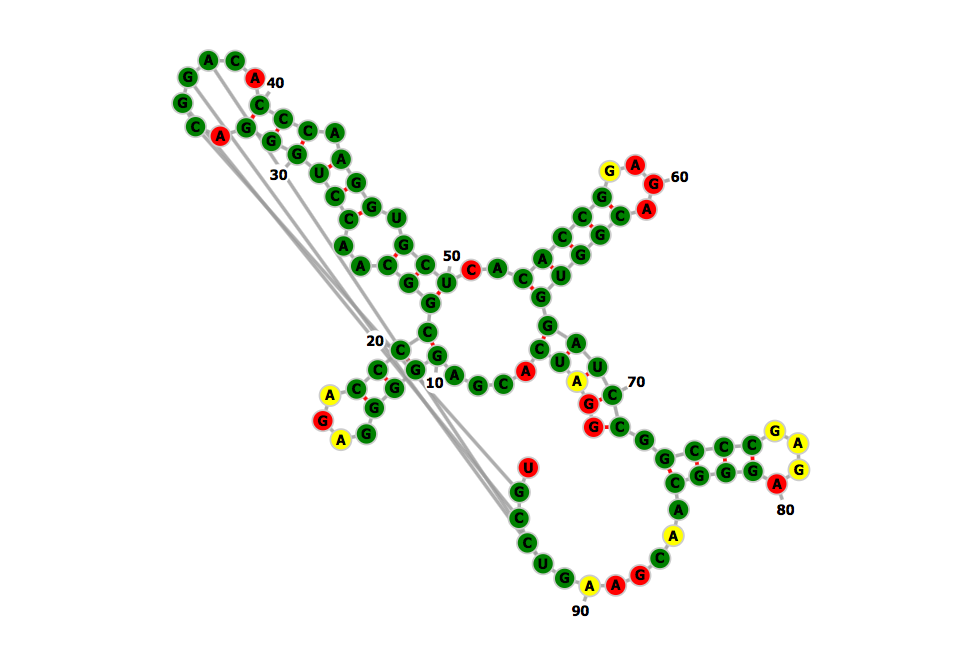

s/4p8z


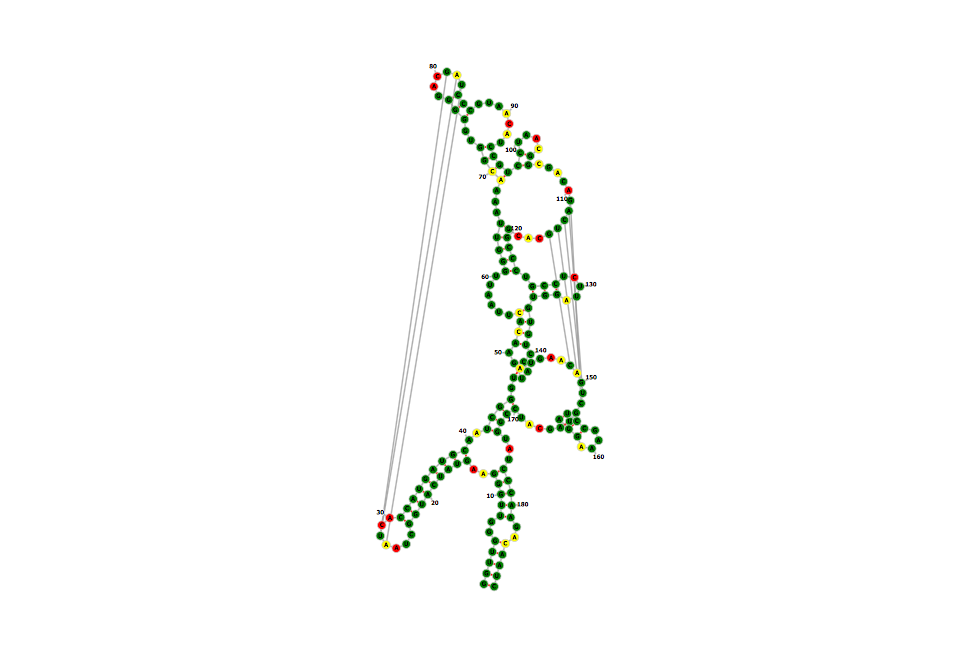

s/4qlm


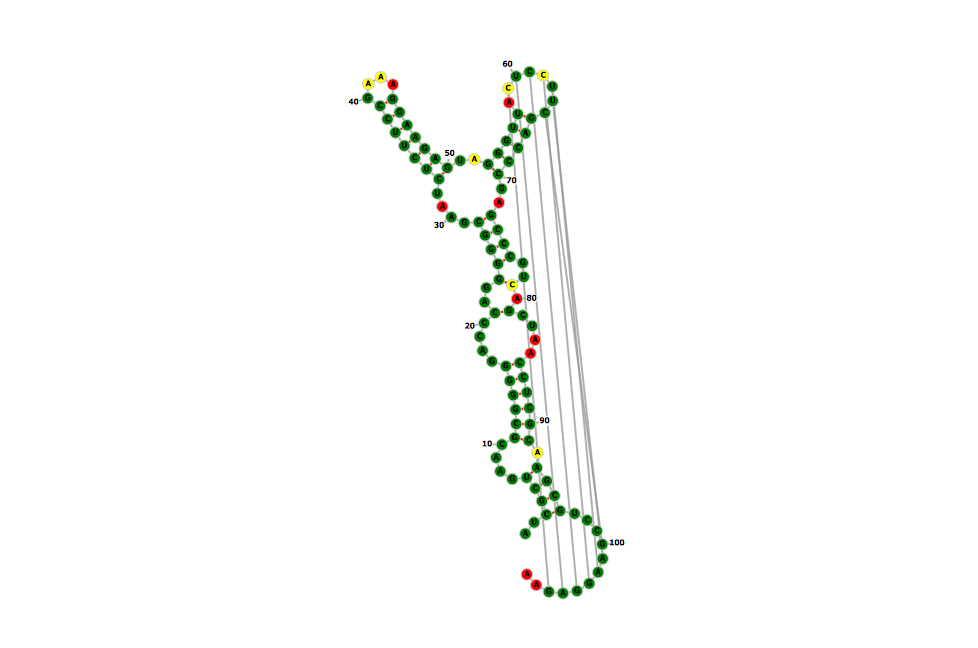

s/4xw7


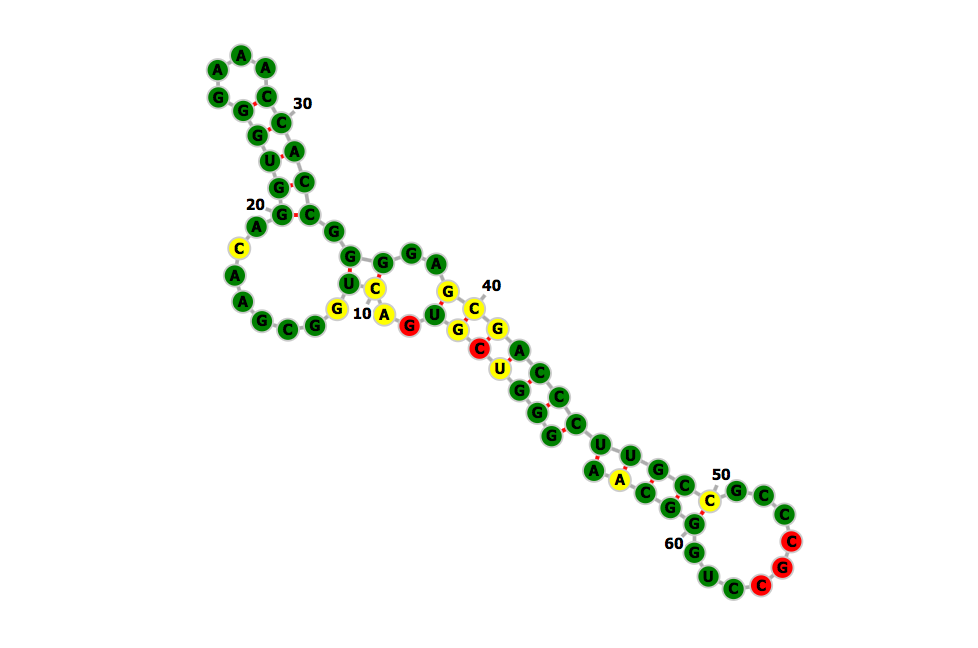

s/4ybb


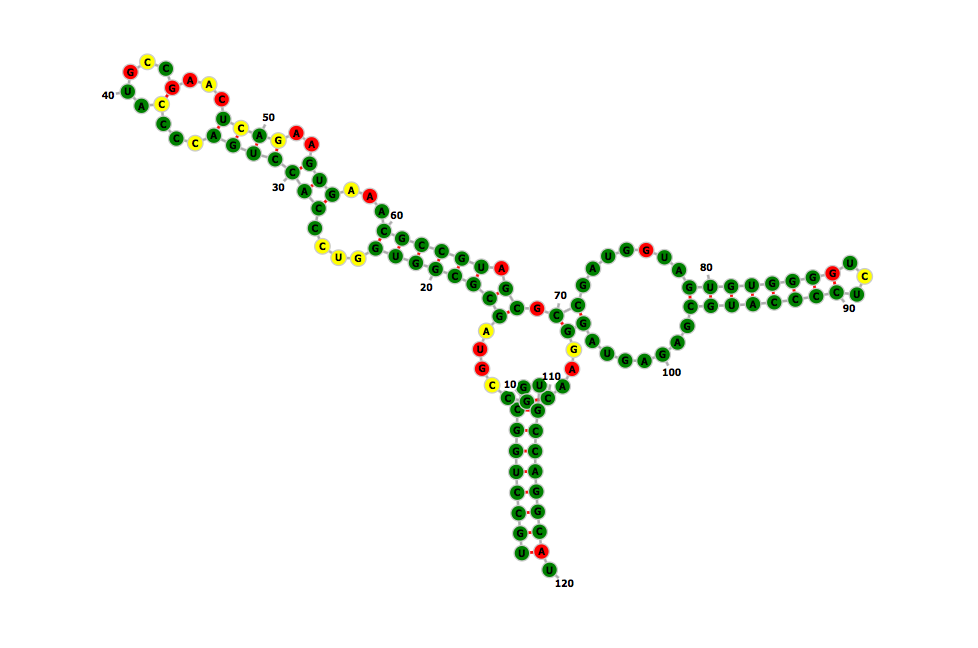

s/5kpy


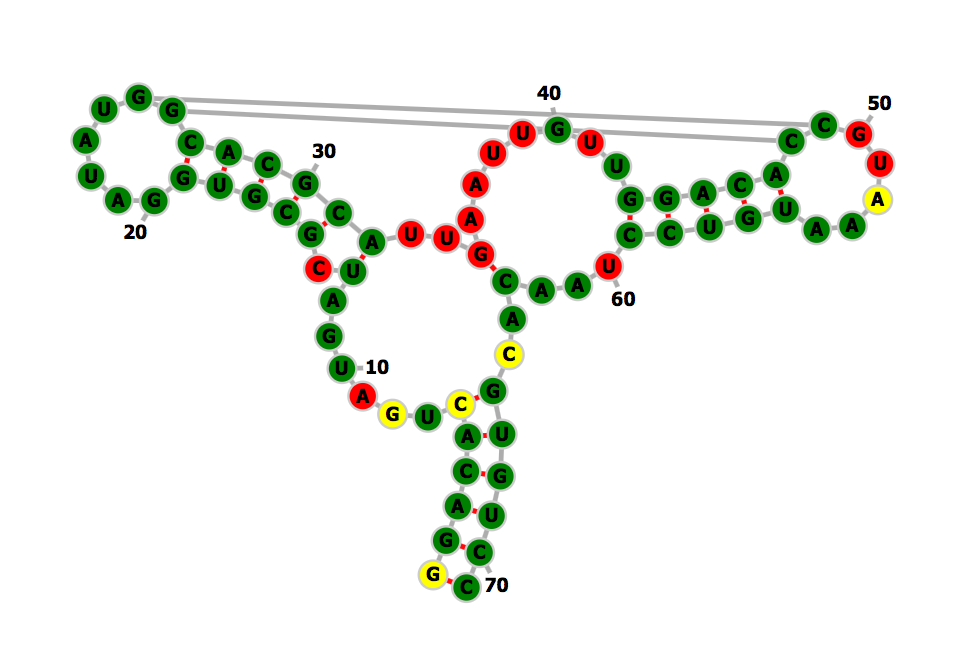

s/single_nucleotide_p


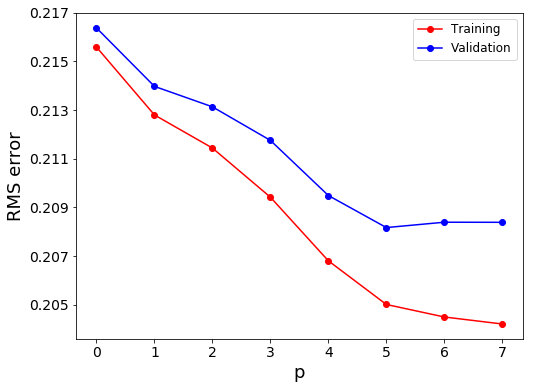

In [4]:
import IPython.display as dp
files = !ls si_figures/*.png
images = []
pdbs = []
for file in files:
    pdbs.append(file[9:-4])
    images.append(dp.Image(filename=file, format='png', width=500))
for i,im in enumerate(images):
    print(pdbs[i])
    dp.display_png(im)

## S3 Neighboring nucleotides in chemical probing experiments
We present a set of linear models that predict the pairing state $s_i$ of single nucleotides without using folding algorithms. Different models combine linearly the reactivities of a different number of neighbors ($r_{i-p},\dots,r_{i+p},\quad p\in\{0,\dots,7\}$), together with the identity $I_i$ of the nucleotide ($I(A)=0$, $I(U)=1$,$I(C)=2$,$I(G)=3$) and its own reactivity $r_i$.

\begin{equation}
s_i(\{r\},I_i)=\sum\limits_{k=-p}^{p}w_kr_{i+k}+w_II_i+c
\end{equation}

The dataset is first split randomly into a training set (size 0.7 of the original dataset) and a validation set (size 0.3). 

The parameters of each model  ($w_0,\{w_k\},w_I,c$) are optimized on the training set by minimizing the RMS error (in-sample error) on the predicted pairing state ($s_i=0$ for unpaired, $s_i=1$ for paired). The out-sample error is estimated as the RMS of predictions on the validation set.

Here we plot the in-sample error (Training) and out-sample error (Validation), averaged for each model on 200 random splittings, against p, that is the parameter that controls the number of neighbors considered.

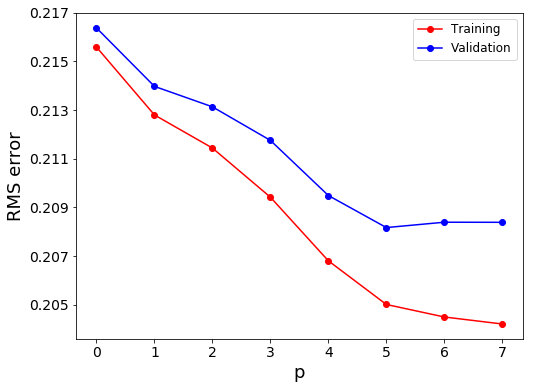

In [5]:
from IPython.display import Image
Image("si_figures/single_nucleotide_p.png", width='500')

The results show that including up to the 5th neighbor in the reactivity profile is advantageous for predicting pairing states. 

## S4 Model optimization

Once the dataset is complete, models can be trained and tested.
In this repository, you will find a Pyhton script called 'model_optimize.py' that can be run to either train a model or to test it by the leave-one-out procedure reported in the main text.
In both cases the optimization procedure is based on the following derivatives of the cost function $\mathcal{C}\left(\{a_k,b\}, \{A,B,C,D\}\right)$ defined in the main text:
\begin{equation}\label{derivatives}
\begin{aligned}
        &\frac{\partial \mathcal{C}}{\partial a_n}=RT\sum\limits_{i=1}^{l_{seq}}\left(p_i-\hat{s}_i\right)\frac{\partial\lambda_i}{\partial a_n}
        =RT\sum\limits_{i=1}^{l_{seq}}\left(p_i-\hat{s}_i\right)R_{i+n}\\
        &\frac{\partial \mathcal{C}}{\partial b}=RT\sum\limits_{i=1}^{l_{seq}}\left(p_i-\hat{s}_i\right)\frac{\partial\lambda_i}{\partial b}
        =RT\sum\limits_{i=1}^{l_{seq}}\left(p_i-\hat{s}_i\right)\\
        &\frac{\partial \mathcal{C}}{\partial A}=RT\sum\limits_{j>i+2}^{l_{seq}}\left(\hat{s}_{ij}-p_{ij}\right)\frac{\partial\lambda_{ij}}{\partial A}
        =RT\sum\limits_{j>i+2}^{l_{seq}}\left(\hat{s}_{ij}-p_{ij}\right)J_{ij}\cdot C\sigma'\left(AJ_{ij}+B\right)\\
        &\frac{\partial \mathcal{C}}{\partial B}=RT\sum\limits_{j>i+2}^{l_{seq}}\left(\hat{s}_{ij}-p_{ij}\right)\frac{\partial\lambda_{ij}}{\partial B}
        =RT\sum\limits_{j>i+2}^{l_{seq}}\left(\hat{s}_{ij}-p_{ij}\right)\cdot C\sigma'\left(AJ_{ij}+B\right)\\
        &\frac{\partial \mathcal{C}}{\partial C}=RT\sum\limits_{j>i+2}^{l_{seq}}\left(\hat{s}_{ij}-p_{ij}\right)\frac{\partial\lambda_{ij}}{\partial C}
        =RT\sum\limits_{j>i+2}^{l_{seq}}\left(\hat{s}_{ij}-p_{ij}\right)\sigma\left(AJ_{ij}+B\right)\\
        &\frac{\partial \mathcal{C}}{\partial D}=RT\sum\limits_{j>i+2}^{l_{seq}}\left(\hat{s}_{ij}-p_{ij}\right)\frac{\partial\lambda_{ij}}{\partial D}
        =RT\sum\limits_{j>i+2}^{l_{seq}}\left(\hat{s}_{ij}-p_{ij}\right)\\
\end{aligned}
\end{equation}
The triplet of hyperparameters ($\alpha_S$ for the regularization of SHAPE penalties, $\alpha_D$ for that of DCA penalties and $p$ for the number of neighbouring reactivities to be included in the SHAPE penalties) that defines a model must be given as parameters to the script in the following order:
- $\color{red}{\texttt{\$as}} = \alpha_S$
- $\color{red}{\texttt{\$ad}} = \alpha_D$
- $\color{red}{\texttt{\$p}} = p$, 
- optimization phase (either `train` for training or `test` for leave-one-out).
- In case one is performing the leave-one-out test, also the index of molecule to be left out must be specified, through the variable $\color{red}{\texttt{\$leftout}}$.

Results that by default are saved to a text file include: pdb code, molecule index, cost function averaged on the training set, cost function for the specific system with ViennaRNA and with the trained model, MCC between the MFE structure and the native one, for each system, first with ViennaRNA and then with the trained model. These are saved to a file that must be specified thorugh the variable $\color{red}{\texttt{\$results_file}}$.
Optimized values of model parameters are saved to a file that must be specified thrugh the variable $\color{red}{\texttt{\$parameters_file}}$. Since multiple minimization are performed with different initial parameters, also the corresponding initial parameters are stored.

Here you find two examples on how to run the script:
- Training: 

$\texttt{python3 model_optimize.py}$ $\texttt{\$as}$ $\texttt{\$ad}$ $\texttt{\$p}$ train $\texttt{\$results_file}$ $\texttt{\$parameters-_file}$
- Leave-One-Out

$\texttt{python3 model_optimize.py}$ $\texttt{\$as}$ $\texttt{\$ad}$ $\texttt{\$p}$ test $\texttt{\$results_file}$ $\texttt{\$parameters-_file}$ $\texttt{\$leftout}$ 

Since optimal parameters of simpler and more strongly regularized models are intended to be passed as initial parameter values of more complex and less regularized models, as described in the main text, by default the script reads the output parameters of a precedent stage of the minimization from parameter files called $\texttt{ewregl\$\{as\}}$_ $\texttt{\$\{ad\}}$ _ $\texttt{\$\{p\}}$ _ $\texttt{\$\{mod\}}$ _ $\texttt{par.dat}$. Thus it is recommended to name the output parameters files in the same way. This can be changed easily by modifying the script. Consider that in order to find the parameter files the script assumes that the smallest regularization parameter larger than zero in the grid is 0.0001 and the largest regularization parameter smaller than infinity in the grid is 1.0. This can be changed editing the script as well. In the next section results will be extracted from output files named in the default way.

#### Useful scripts

##### SLURM job for training or cross-validation

In [6]:
# #!/bin/sh
# #SBATCH --time=<single minimization runtime>
# #SBATCH --job-name=<user defined job name>
# sleep 10
# echo $SLURM_JOB_ID 
# set -e
# alphass[6]=0.0
# alphass[5]=0.0001
# alphass[4]=0.001
# alphass[3]=0.01
# alphass[2]=0.1
# alphass[1]=1.0
# alphass[0]=inf
# alphadd[6]=0.0
# alphadd[5]=0.0001
# alphadd[4]=0.001
# alphadd[3]=0.01
# alphadd[2]=0.1
# alphadd[1]=1.0
# alphadd[0]=inf
# pp[3]=3
# pp[2]=2
# pp[1]=1
# pp[0]=0
# alphas=${alphass[ii]}
# alphad=${alphadd[jj]}
# p=${pp[kk]}

# ####### traininig
# if [ ! -f ewregl${alphas}_${alphad}_${p}_train_par.dat ]; then
# python3.6 model_optimize.py 0 ${alphas} ${alphad} ${p} ewregl${alphas}_${alphad}_${p}_train.dat ewregl${alphas}_${alphad}_${p}_train_par.dat train

# fi

# ####### cross-validation
# if [ ! -f ewregl${alphas}_${alphad}_${p}_test_par.dat ]; then
#     for((mol=0;mol<12;mol+=1)); do
#         python3.6 model_optimize.py ${mol} ${alphas} ${alphad} ${p} ewregl${alphas}_${alphad}_${p}_test.dat ewregl${alphas}_${alphad}_${p}_test_par.dat test

##### Python script to launch training or cross-validation jobs with the correct dependencies

In [7]:
# import numpy as np
# import subprocess as sp
# import os
# npar=np.array((7,7,4))
# a=['inf','1.0','0.1','0.01','0.001','0.0001','0.0']
# p=['0','1','2','3']
# jobs=[]
# j=0
# for i in range(np.sum(npar-1)+1):
#   jobs.append([])
#   for idx,val in np.ndenumerate(np.reshape(range(np.prod(npar)),npar)):
#     if(np.sum(idx)==i):
#       jobs[-1].append(idx)
# jobs=np.array(jobs)
# jobid={}
# for job in jobs:
#     command="sed 's/ii/"+str(job[0])+"/g;s/jj/"+str(job[1])+"/g;s/kk/"+str(job[2])+"/g' job_train | sbatch"
#     deps=""
#     for d in range(len(npar)):
#         if(job[d]!=0):
#             l=+job
#             l[d]-=1
#             try:
#                 deps+=":"+jobid[l.tostring()]
#             except KeyError:
#                 pass
#     if(len(deps)>0):
#         command=command+" --dependency=afterok"+deps
#     if not os.path.isfile('ewregl'+a[job[0]]+'_'+a[job[1]]+'_'+p[job[2]]+'_train_par.dat'):
#         jobid[job.tostring()]=str(sp.check_output(command, shell=True))[22:-3]
#         print('launching ', jobid)

### S4.1 Analysis of results
Here we collect results of model optimization for each system (identified by 'pdb'), each random splitting of the dataset (different values of 'seed'), and for each model (defined by 'alpha_s','alpha_d' and 'p'). The cost function
\begin{equation}
\mathcal{C}_0=-RT\ln P_0\left(\hat{s} | \vec{seq}\right)
\end{equation}
assigned to native structures $\hat{s}$ via unmodified ViennaRNA is indicated by 'vienna_cost', for comparison with that obtained with each trained model,
\begin{equation}
\mathcal{C}\left(\{a_k,b\}, \{A,B,C,D\}\right)=-RT\ln P\left(\hat{s} | \vec{seq}, \vec{R}, \vec{J}\right)
\end{equation}
called 'train_cost'. The cost function related to the native structure of each molecule, when that is the one left-out for transferability estimation, is indicated by 'test_cost'.
Dataset splittings reported in the main text as $\{S1,\dots,S5\}$ correspond to values of 'seed' $\{1995,\dots,1999\}$.

In order to decrease the size of this repository, we directly include a pandas dataset (`results.p`) that contains all the results. The script in the following cell reads the results from the output files produced as described above.

In [8]:
## We first make a hard copy of the dataset for possible modifications
dataset = data.copy()
from sklearn.model_selection import train_test_split ## method to generate random splittings of the dataset  
## We build up a Pandas DataFrame to collect results. The dataframe is already saved to the file 'results.p' in
## this repistory. In case you want to build up a new data frame with different results, just name it differently 
## from 'results' or either rename the file 'results.p'
results = pd.DataFrame(columns=['pdb','seed','p','alpha_s','alpha_d','vienna_cost','train_cost', 'test_cost'])
if os.path.isfile('./results.p')==False:
    alpha_s = [np.inf,1e0,1e-1,1e-2,1e-3,1e-4,0.0]
    alpha_d = alpha_s.copy()
    p = range(4)
    seed = [1995,1996,1997,1998] ## these correspond to dataset splittings [S1,S2,S3,S4]
    for sd in seed:
        train, test = train_test_split(dataset, test_size=0.3,random_state=sd)
        for ass in alpha_s:
            for add in alpha_d:
                for k in p:
                    file=str(sd)+'_slqs/ewregl'+str(ass)+'_'+str(add)+'_'+str(k)+'_test.dat'
                    trainset = np.array(train.pdb.values, dtype=str)
                    trainset.sort()
                    f=open(file,'r')
                    g=f.readlines()
                    f.close()
                    file=str(sd)+'_slqs/ewregl'+str(ass)+'_'+str(add)+'_'+str(k)+'_train.dat'
                    f=open(file,'r')
                    h=f.readlines()
                    for m,mol in enumerate(trainset):
                        results = results.append({'pdb': mol,'seed': sd, 'p': k,'alpha_s': ass,'alpha_d': add,
                                                  'vienna_cost': float(g[m].split()[3]),
                                                  'train_cost': float(g[m].split()[4]),
                                                  'test_cost': float(g[m].split()[4])},ignore_index=True)
                    f.close()
    results.to_pickle('./results.p')
else:
    results=pd.read_pickle('./results.p')

In [9]:
## Here we add average cost function in test for each model
seeds = [1995,1996,1997,1998]
alpha_s = [np.inf,1e0,1e-1,1e-2,1e-3,1e-4,0.0]
alpha_d = alpha_s.copy()
p = range(4)
results['test_cost_average'] = 0.0
results['train_cost_average'] = 0.0
for seed in seeds:
    for ass in alpha_s:
        for add in alpha_d:
            for k in p:
                results.loc[ (results.seed==seed) & (results.p==k) & (results.alpha_s==ass) & 
                            (results.alpha_d==add), 'train_cost_average']=results[(results.seed==seed) &
                            (results.p==k) & (results.alpha_s==ass) & 
                            (results.alpha_d==add)].train_cost.values.mean()
                results.loc[ (results.seed==seed) & (results.p==k) & 
                            (results.alpha_s==ass) & (results.alpha_d==add),
                            'test_cost_average']=results[(results.seed==seed) & 
                                                         (results.p==k) & (results.alpha_s==ass) 
                                                         & (results.alpha_d==add)].test_cost.values.mean()

In [10]:
# We now build up a Pandas DataFrame containing all the optimized parameters 
# for each model and dataset splitting. For each model, parameters are split 
# into parameters of DCA nodes ('par_dca') and parameters of SHAPE nodes ('par_shape').
models_trained = pd.DataFrame(columns=['seed','p','alpha_s','alpha_d','par_dca','par_shape'])
alpha_s = [np.inf,1e0,1e-1,1e-2,1e-3,1e-4,0.0]
alpha_d = alpha_s.copy()
p = range(4)
seeds = [1995,1996,1997,1998,1999]
if os.path.isfile('./models_trained.p')==False:
    for seed in [1997]:
        train, test = train_test_split(dataset, test_size=0.2,random_state=seed)
        for i in alpha_s:
            for j in alpha_d:
                for k in p:
                    f=open(str(seed)+'_slqs/ewregl'+str(i)+'_'+str(j)+'_'+str(k)+'_train_par.dat').readlines()
                    pars=np.array(f[f.index('# Optimal parameters\n')+1:f.index('# Optimal parameters\n')+4+2*k+2+1],
                                  dtype=float)
                    if np.isinf(i):
                        pars[4:]=np.zeros(len(pars[4:]))
                    if np.isinf(j):
                        pars[:4]=np.zeros(4)
                    models_trained = models_trained.append({'seed': seed,'p': k, 'alpha_s': i, 
                                                            'alpha_d': j, 'par_dca': pars[:4], 
                                                            'par_shape': pars[4:]}, ignore_index=True)
    models_trained.to_pickle('./models_trained.p')
else:
    models_trained=pd.read_pickle('./models_trained.p')
models_tested = pd.DataFrame(columns=['seed','p','alpha_s','alpha_d','pdb','par_dca','par_shape'])
alpha_s = [np.inf,1e0,1e-1,1e-2,1e-3,1e-4,0.0]
alpha_d = alpha_s.copy()
p = range(4)
if os.path.isfile('./models_tested.p')==False:
    for seed in seeds:
        train, test = train_test_split(dataset, test_size=0.2,random_state=seed)
        for i in alpha_s:
            for j in alpha_d:
                for k in p:
                    for lo in train.pdb.values:
                        f=open(str(seed)+'_slqs/ewregl'+str(i)+'_'+str(j)+'_'+str(k)+'_test_par.dat').readlines()
                        pars=np.array(f[f.index('# best final pars for '+lo+'\n')+
                                        1:f.index('# best final pars for '+lo+'\n')+4+2*k+2+1],dtype=float)                          
                        if np.isinf(i):
                            pars[4:]=np.zeros(len(pars[4:]))
                        if np.isinf(j):
                            pars[:4]=np.zeros(4)
                        models_tested = models_tested.append({'seed': seed,'p': k, 'alpha_s': i, 'alpha_d': j, 
                                                              'pdb': lo, 'par_dca': pars[:4], 
                                                              'par_shape': pars[4:]}, ignore_index=True)
    models_tested.to_pickle('./models_tested.p')
else:
    models_tested=pd.read_pickle('./models_tested.p')    

## S5 Model selection

For each random splitting of the dataset ('seed'), we look for the model that performs best in the leave-one-out procedure, that means the model that achieves the largest decrease in the cost function associated to native structure.

In [11]:
print('Seed\t p \t alpha_S \t alpha_D \t Cost decrease')
seeds = [1995,1996,1997,1998]
for seed in seeds:
    im = results[results.seed==seed].test_cost_average.idxmin()
    p_m = results.loc[im].p
    add_m = results.loc[im].alpha_d
    ass_m = results.loc[im].alpha_s
    cost_decrease = list((results[(results.p==p_m) & (results.alpha_d==add_m) & (results.alpha_s==ass_m) & (results.seed==seed)].test_cost_average.values-results[(results.p==p_m) & (results.alpha_d==add_m) & (results.alpha_s==ass_m) & (results.seed==seed)].vienna_cost.values.mean()))[0]
    print('%d\t%d\t%1.5f\t\t%1.5f\t\t%1.5f' % (seed,p_m,ass_m,add_m,cost_decrease))

Seed	 p 	 alpha_S 	 alpha_D 	 Cost decrease
1995	0	0.00000		0.00100		-1.57002
1996	0	0.00100		0.00100		-1.22664
1997	0	0.00100		0.00100		-1.11622
1998	0	0.00100		0.00100		-1.41489


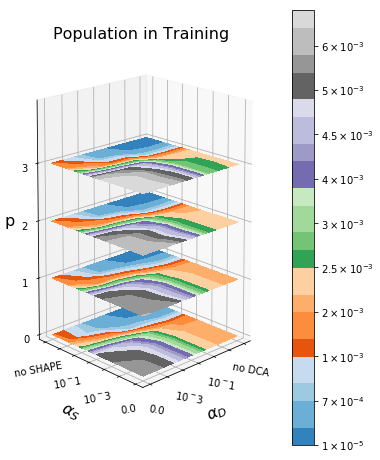

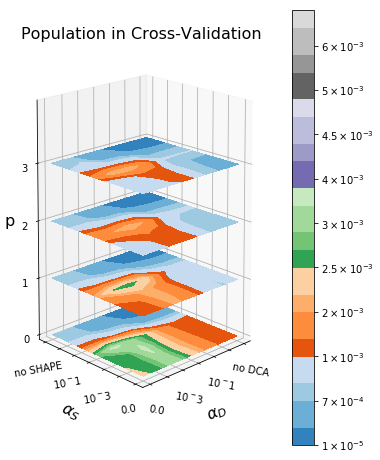

In [12]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
seed = 1997 # 1995 1996 1997 1999 can be selected
RT = 0.61633119654
train = np.zeros((len(set(results.alpha_s.values)),len(set(results.alpha_d.values)),len(set(results.p.values))))
test = train.copy()
vienna = test.copy()
for i,ass in enumerate(np.sort(list(set(results.alpha_s.values)))):
    for j,add in enumerate(np.sort(list(set(results.alpha_d.values)))):
        for k,p in enumerate(np.sort(list(set(results.p.values)))):
            test[i,j,k] = results[(results.seed==seed) & (results.p==p) & 
                        (results.alpha_s==ass) & (results.alpha_d==add)].test_cost_average.values[0]
            train[i,j,k] = results[(results.seed==seed) & (results.p==p) & 
                        (results.alpha_s==ass) & (results.alpha_d==add)].train_cost_average.values[0]
            vienna[i,j,k] = np.mean(results[(results.seed==seed) & (results.p==p) & 
                        (results.alpha_s==ass) & (results.alpha_d==add)].vienna_cost.values)

x = np.log10(np.sort(list(set(results.alpha_s.values))+[10])[:-1]+1e-5)
X, Y = np.meshgrid(x, x)
for (Z,phase) in [(train, 'Training'),(test,'Cross-Validation')]:
    fig = plt.figure(figsize=(6,8))
    ax = fig.gca(projection='3d')
    # Z = train
    #Z = test
    Z = np.exp(-Z/RT)
    levels = np.linspace(np.min(np.exp(-test/RT)), np.max(np.exp(-train/RT)), 50)
    cmap='tab20c'
    ax.contourf(X, Y, 0+.01*Z[:,:,0], zdir='z',levels=0+.01*levels, cmap=cmap)
    ax.contourf(X, Y, 2+.01*Z[:,:,1], zdir='z',levels=2+.01*levels, cmap=cmap)
    ax.contourf(X, Y, 4+.01*Z[:,:,2], zdir='z',levels=4+.01*levels, cmap=cmap)
    ax.contourf(X, Y, 6+.01*Z[:,:,3], zdir='z',levels=6+.01*levels, cmap=cmap)
    ax.view_init(azim=-134,elev=12)
    ax.set_title('Population in '+phase,fontsize=16)
    ax.set_xlabel(r'$ \alpha_{D} $',fontsize=16, labelpad=10)
    ax.set_xticks([-5.00000000e+00, -3.95860731e+00, -2.99567863e+00, -1.99956592e+00,
                   -9.99956573e-01,  4.34292310e-06,  1.00000043e+00])
    ax.set_xticklabels(['0.0','',r'$10^-3$','',r'$10^-1$','','no DCA'],fontsize=10,rotation=-10)
    ax.set_ylabel(r'$ \alpha_{S} $',fontsize=16, labelpad=10)
    ax.set_yticks([-5.00000000e+00, -3.95860731e+00, -2.99567863e+00, -1.99956592e+00,
                   -9.99956573e-01,  4.34292310e-06,  1.00000043e+00])
    ax.set_yticklabels(['0.0','  ',r'$10^-3$','  ',r'$10^-1$','  ','no SHAPE'],fontsize=10,rotation=10)
    ax.set_zlabel('p', rotation='horizontal',fontsize=16)
    ax.set_zticks([0,2,4,6])
    ax.set_zticklabels([0,1,2,3],fontsize=10)
    ax.set_zlim3d(0,8)
    a = plt.contourf(X, Y, .01*Z[:,:,3], zdir='z',levels=levels, cmap=cmap)
    def sci_notation(num, decimal_digits=1, precision=None, exponent=None):
        if exponent is None:
            exponent = int(floor(log10(abs(num))))
        coeff = round(num / float(10**exponent), decimal_digits)
        if precision is None:
            precision = decimal_digits
        return r"${0:.{2}f}\cdot10^{{{1:d}}}$".format(coeff, exponent, precision)
    import matplotlib.colors as cl
    cb = plt.colorbar(a)
    cb.ax.set_yticklabels([r'$1\times 10^{-5}$',r'$7\times 10^{-4}$',r'$1\times 10^{-3}$',
                   r'$2\times 10^{-3}$',r'$2.5\times 10^{-3}$',r'$3\times 10^{-3}$',
                   r'$4\times 10^{-3}$',r'$4.5\times 10^{-3}$',r'$5\times 10^{-3}$',r'$6\times 10^{-3}$'])
plt.show()

### S5.1 Restricted model selection 

For each random splitting of the dataset ('seed'), we look for the model that performs best in the leave-one-out procedure, restricted to the cases where only chemical probing data are used ($\alpha_D=\infty$) and where only coevolutionary data are used ($\alpha_S=\infty$).

#### Chemical probing only

In [13]:
print('Seed\t p \t alpha_S \t alpha_D \t Cost decrease')
seeds = [1995,1996,1997,1998]
for seed in seeds:
    im = results[(results.seed==seed) & (results.alpha_d==np.inf)].test_cost_average.idxmin()
    p_m = results.loc[im].p
    add_m = results.loc[im].alpha_d
    ass_m = results.loc[im].alpha_s
    cost_decrease = list((results[(results.p==p_m) & (results.alpha_d==add_m) & 
                                (results.alpha_s==ass_m) & 
                                (results.seed==seed)].test_cost_average.values-results[(results.p==p_m) & 
                                (results.alpha_d==add_m) & (results.alpha_s==ass_m) & 
                                (results.seed==seed)].vienna_cost.values.mean()))[0]
    print('%d\t%d\t%1.5f\t\t%1.5f\t\t%1.5f' % (seed,p_m,ass_m,add_m,cost_decrease))

Seed	 p 	 alpha_S 	 alpha_D 	 Cost decrease
1995	0	0.00000		inf		-0.66064
1996	0	0.00100		inf		-0.47844
1997	0	0.01000		inf		-0.70484
1998	0	0.01000		inf		-0.73118


#### Coevolutionary data only

In [14]:
print('Seed\t p \t alpha_S \t alpha_D \t Cost decrease')
seeds = [1995,1996,1997,1998]
for seed in seeds:
    im = results[(results.seed==seed) & (results.alpha_s==np.inf)].test_cost_average.idxmin()
    p_m = results.loc[im].p
    add_m = results.loc[im].alpha_d
    ass_m = results.loc[im].alpha_s
    cost_decrease = list((results[(results.p==p_m) & (results.alpha_d==add_m) & 
                        (results.alpha_s==ass_m) & 
                        (results.seed==seed)].test_cost_average.values-results[(results.p==p_m) & 
                        (results.alpha_d==add_m) & (results.alpha_s==ass_m) & 
                        (results.seed==seed)].vienna_cost.values.mean()))[0]
    print('%d\t%d\t%1.5f\t\t%1.5f\t\t%1.5f' % (seed,p_m,ass_m,add_m,cost_decrease))

Seed	 p 	 alpha_S 	 alpha_D 	 Cost decrease
1995	3	inf		0.00000		-1.10844
1996	0	inf		0.00000		-0.95914
1997	3	inf		0.00010		-0.43591
1998	0	inf		0.00000		-0.91241


## S6 Optimal Parameters

### S6.1 Reactivity channel
In the reactivity channel of the network, reactivities $R_{i}$ are mapped to pairing penalties for individual nucleobases. The activation function of the single layer of reactivity nodes is: 
\begin{equation}
\lambda_{i}\left(\vec{R}\right)=\sum\limits_{k=-p}^{+p}a_k\cdot R_{i+k}+b
\end{equation}

In the next cell, optimal values of model paramters $\{\{a_k\}, b\}$, for the optimal model with $p=0$, and for the suboptimal models with $p>0$ are plotted.

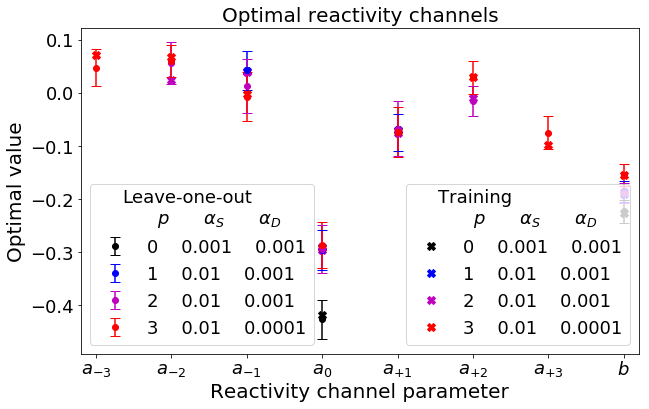

In [15]:
models_tested = pd.read_pickle('models_tested.p')
models_trained = pd.read_pickle('models_trained.p')
seed=1997
plt.figure(figsize=(10,6))
colors=['k','b','m','r']
line1=[]
line2=[]
tp = []
for p in [0,1,2,3]:
    im = results[(results.seed==seed) & (results.p==p)].test_cost_average.idxmin()
    p_min = p
    add_min = results.loc[im].alpha_d
    ass_min = results.loc[im].alpha_s
    test_pars = models_tested[(models_tested.seed==seed) & (models_tested.p==p_min) & 
                              (models_tested.alpha_s==ass_min) & 
                              (models_tested.alpha_d==add_min)].par_shape.values
    errors = np.std(test_pars)
    train_pars = models_trained[(models_trained.seed==seed) & (models_trained.p==p_min) & 
                              (models_trained.alpha_s==ass_min) & 
                              (models_trained.alpha_d==add_min)].par_shape.values[0]
    tp.append(train_pars)
    if p > 0:
        x = list(range(-p,p+1))+[4]
    else:
        x = [0,4]
    line1.append(plt.errorbar(x,np.mean(test_pars),errors, fmt='o', label=str(p_min)+'    '+str(ass_min)+'    '+str(add_min), capsize=5, color=colors[p]))
    line2.append(plt.plot(x,train_pars,'X', markersize=8, color=colors[p],label=str(p_min)+'    '+str(ass_min)+'    '+str(add_min))[0])
plt.xticks(list(range(-3,3+1))+[4], 
           labels=[r'$a_{-3}$',r'$a_{-2}$',r'$a_{-1}$',r'$a_{0}$',r'$a_{+1}$',r'$a_{+2}$',r'$a_{+3}$',r'$b$'],
           fontsize=18)
plt.yticks(fontsize=18)
plt.xlim(-3.2,4.2)
plt.xlabel('Reactivity channel parameter', fontsize=20)
plt.ylabel('Optimal value', fontsize=20)
plt.title('Optimal reactivity channels', fontsize=20)
first_legend = plt.legend(handles=line1,loc='lower left',
                          title='Leave-one-out\n'+r'$\qquad p\qquad\alpha_S\qquad\alpha_D$',
                          title_fontsize=18,fontsize=18)
ax = plt.gca().add_artist(first_legend)
plt.legend(handles=line2[:],loc='lower right',title='Training\n'+r'$\qquad p\qquad\alpha_S\qquad\alpha_D$',
           title_fontsize=18,fontsize=18)
plt.show()

### S6.2 DCA channel
In the DCA channel of the network, DCA copulings $J_{ij}$ are mapped to pairing penalties for specific pairs of nucleobases. The composed activation function resulting from the two layers of DCA nodes is: 
\begin{equation}
\lambda_{ij}\left(J_{ij}\right)=C\cdot\sigma\left(A\cdot J_{ij}+B\right)+D
\end{equation}

In the next cell, optimal values of model parameters $\{A,B,C,D\}$ are plotted. Since the function output is unchanged if A, B, and C simultaneously change sign, to better compare different sets of parameters we always set arbitrarly $A,B,C$ as positive.

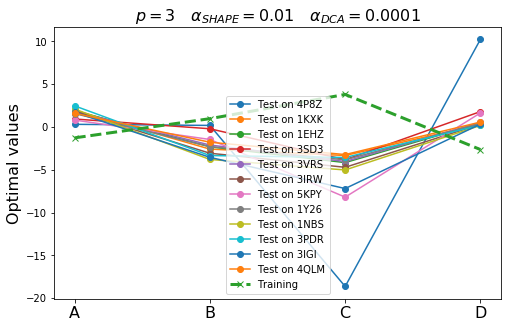

In [16]:
seed = 1997
test_pars = models_tested[(models_tested.seed==seed) & (models_tested.p==p_min) & (models_tested.alpha_s==ass_min) & (models_tested.alpha_d==add_min)]
train_pars = models_trained[(models_trained.seed==seed) & (models_trained.p==p_min) & (models_trained.alpha_s==ass_min) & (models_trained.alpha_d==add_min)]
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5)) 
for i in range(len(test_pars.par_dca.values)):
    if test_pars.par_dca.values[i][0]<=0:
        # fix for invariance when the sign of A,B,C is changed.
        a,b,c=-test_pars.par_dca.values[i][:3]
        d=test_pars.par_dca.values[i][-2]
        plt.plot([a,b,c,d],'o-', label = 'Test on '+test_pars.pdb.values[i])
    else:
        plt.plot(test_pars.par_dca.values[i],'o-', label = 'Test on '+
                 test_pars.pdb.values[i])#,label=test_pars.pdb.values[i])
for i in range(len(train_pars.par_dca.values)):    
      plt.plot(train_pars.par_dca.values[i],'x--',label = 'Training', linewidth=3)
plt.xticks([0,1,2,3],['A','B','C','D'],fontsize=16)
plt.ylabel('Optimal values',fontsize=16)
plt.title(r'$p=$'+str(p_min)+r'$\quad\alpha_{SHAPE}=$'+str(ass_min)+r'$\quad\alpha_{DCA}=$'+
          str(add_min),fontsize=16)
plt.legend()
plt.show()

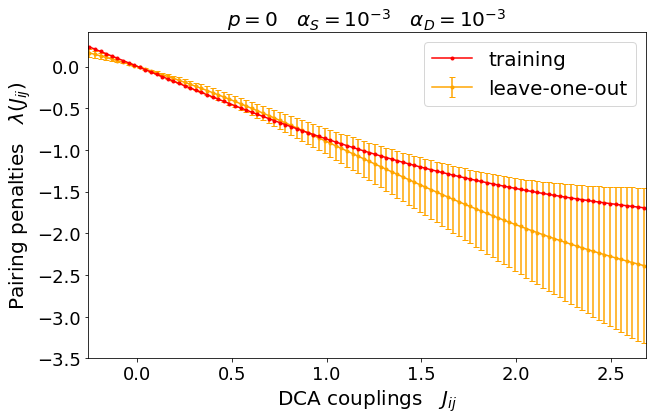

In [17]:
seed=1997
p_min = 0
ass_min = 0.001
add_min = 0.001
test_pars = models_tested[(models_tested.seed==seed) & (models_tested.p==p_min) &
                          (models_tested.alpha_s==ass_min) & 
                          (models_tested.alpha_d==add_min)]
train_pars = models_trained[(models_trained.seed==seed) & (models_trained.p==p_min) &
                          (models_trained.alpha_s==ass_min) & 
                          (models_trained.alpha_d==add_min)].par_dca.values[0]
if np.isinf(ass_min):
    train_pars=np.zeros(len(pars[4:]))
if np.isinf(add_min):
    train_pars=np.zeros(4)
plt.figure(figsize=(10,6))
def sigmoid_for_plot(x,pp):
    if pp[0]<=0:
        out=-pp[-2]*(1/(1+np.exp(-(-pp[0]*x-pp[1]))))+(pp[-1]+pp[-2])
    else:
        out=pp[-2]*(1/(1+np.exp(-(pp[0]*x+pp[1]))))+pp[-1]
    return out
y=[]
tp = np.zeros((12,4))
tpm = train_pars[:4]
x=np.linspace(np.min(data.dca.values[0]),np.max(data.dca.values[0]),100)
for i in range(len(test_pars[test_pars.seed==seed].par_dca.values)):
    tp[i] = test_pars[test_pars.seed==seed].par_dca.values[i]
    y.append(sigmoid_for_plot(x,tp[i]))
yave = np.mean(y,axis=0)
y2ave = np.mean(np.power(y,2),axis=0)
err = np.sqrt(y2ave-np.power(yave,2))
plt.errorbar(x,yave,err,linestyle='-',marker='.',color='orange',barsabove=True,capsize=3,label='leave-one-out')
plt.plot(x,sigmoid_for_plot(x,tpm),linestyle='-',marker='.',color='red',label='training')
plt.xlabel('DCA couplings'+r'$\quad J_{ij}$',fontsize=20)
plt.ylabel('Pairing penalties'+r'$\quad\lambda\left(J_{ij}\right)$',fontsize=20)
plt.title(r'$p=$'+str(p_min)+r'$\quad\alpha_{S}=10^{-3}\quad\alpha_{D}=10^{-3}$',fontsize=20)
plt.xlim((np.min(x)-0.01,np.max(x)+0.01))
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=20)
plt.show()

## S7 Prediction comparison between RNAfold and optimal models

In [18]:
RT=0.61633119654
import RNA as rna
import re
def db2matrix(db):
    """Convert dot-bracked to 1/0 matrix"""
    matrix=np.zeros((len(db),len(db)))
    more=True
    while more:
        more=False
        for x in re.finditer("\([^()]*\)",db):
            more=True
            matrix[x.start(),x.end()-1]=1
            matrix[x.end()-1,x.start()]=1
            db=db[0:x.start()] + "." + db[x.start()+1:x.end()-1] + "." + db[x.end():]
    return matrix
def lin(x):
    out=x
    dev=1.0
    return [out,dev]
def sigmoid(x):
    out=1/(1+np.exp(-x))
    dev=np.exp(-x)/((1+np.exp(-x))**2)
    return [out,dev]

def dca(coup,par):
    act=sigmoid(par[0]*coup+par[1])
    dev=np.zeros((len(par),coup.shape[0],coup.shape[1]))
    out=par[2]*act[0]+par[3]
    dev[0,:,:]=par[2]*act[1]*coup
    dev[1,:,:]=par[2]*act[1]
    dev[2,:,:]=act[0]
    dev[3,:,:]=1.0
    return [out,dev]

def loop(shape,seq,index,par,window):
    out=0.0
    dev=np.zeros(len(par))
    nn_left=-window
    nn_right=-nn_left+1
    width=len(range(nn_left,nn_right))+1
    x=np.zeros(width)
    if index < -nn_left:
        nn_left=-index
    if index >= len(shape)+nn_left:
        nn_right=len(shape)-index
    x[nn_left + window: nn_right + window]= shape[index+nn_left:index+nn_right]
    x[-1]=1.0
    activation=lin(np.dot(par[:width],x))
    out=activation[0]
    for i in range(len(dev)):
        dev[i]=activation[1]*x[i]
    return [out, dev]
def mfe(p,par_shape,par_dca,ass,add,dataset,mol,param_file):
    seq = dataset[dataset.pdb==mol].seq.values[0]
    uf = ''
    for i in range(len(seq)):
        uf += '.'
    rna.read_parameter_file(param_file)
    fold = rna.fold_compound(seq)
    R = dataset[dataset.pdb==mol].norm_r.values[0]
    stru = dataset[dataset.pdb==mol].stru.values[0]
    refmx = db2matrix(stru)
    dcamx = dataset[dataset.pdb==mol].dca.values[0]
    if np.isinf(add)==False:
            psen_dca=dca(dcamx,par_dca)
            for i in range(len(seq)):
                for j in range(i+4,len(seq)):
                    fold.sc_add_bp(i+1,j+1,RT*psen_dca[0][i,j])
    if np.isinf(ass)==False:
        for i in range(len(R)):
            psen_shape=loop(R,seq,i,par_shape,p)
            fold.sc_add_up(i+1,RT*psen_shape[0])
    mfe = fold.mfe()
    mfemx = db2matrix(mfe[0])
    tp = 0
    fp = 0
    fn = 0
    for i in range(refmx.shape[0]):
        for j in range(i,refmx.shape[1]):
            if refmx[i,j]==mfemx[i,j] and refmx[i,j]==1:
                tp += 1
            elif refmx[i,j]!=mfemx[i,j]:
                if refmx[i,j]==0:
                    fp += 1
                else:
                    fn += 1
    ppv = 1/(1+(fp/tp))
    sens = 1/(1+(fn/tp))
    mcc = np.sqrt(ppv*sens)
    ufe = fold.eval_structure(uf)
    return [mfe[0],mfe[1]-ufe,mcc]

In [19]:
seed=1997
for mol in data.pdb.values:
    print('Model## PDB## Minimum free-energy structure## Free Energy## MCC')
    ## Reference structure
    stru = data[data.pdb==mol].stru.values[0]
    print('X-RAY\t',mol,str(stru))
    ## RNAfold plain
    p_min = 0
    add_min = np.inf
    ass_min = np.inf
    train_pars = models_trained[(models_trained.seed==seed) & (models_trained.p==p_min) & 
                              (models_trained.alpha_s==ass_min) & 
                              (models_trained.alpha_d==add_min)]
    par_shape = train_pars.par_shape.values[0]
    par_dca = train_pars.par_dca.values[0]
    mfedata = mfe(p_min,par_shape,par_dca,ass_min,add_min,data,mol=mol,param_file='rna_andronescu2007.par')
    print('RNAfold\t',mol,'%s%12.3f%12.3f'%(mfedata[0],mfedata[1], mfedata[2]))

    ## Optimal model
    im = results[(results.seed==seed)].test_cost_average.idxmin()
    p_min = results.loc[im].p
    add_min = results.loc[im].alpha_d
    ass_min = results.loc[im].alpha_s
    train_pars = models_trained[(models_trained.seed==seed) & (models_trained.p==p_min) & 
                              (models_trained.alpha_s==ass_min) & 
                              (models_trained.alpha_d==add_min)]
    par_shape = train_pars.par_shape.values[0]
    par_dca = train_pars.par_dca.values[0]
    mfedata = mfe(p_min,par_shape,par_dca,ass_min,add_min,data,mol=mol,param_file='rna_andronescu2007.par')
    print('optimal\t',mol,'%s%12.3f%12.3f'%(mfedata[0],mfedata[1], mfedata[2]))

    ## Optimal-reactivity
    add_min = np.inf
    im = results[(results.seed==seed) & (results.alpha_d==add_min)].test_cost_average.idxmin()
    p_min = results.loc[im].p
    ass_min = results.loc[im].alpha_s
    train_pars = models_trained[(models_trained.seed==seed) & (models_trained.p==p_min) & 
                              (models_trained.alpha_s==ass_min) & 
                              (models_trained.alpha_d==add_min)]
    par_shape = train_pars.par_shape.values[0]
    par_dca = train_pars.par_dca.values[0]
    mfedata = mfe(p_min,par_shape,par_dca,ass_min,add_min,data,mol=mol,param_file='rna_andronescu2007.par')
    print('opt-R\t',mol,'%s%12.3f%12.3f'%(mfedata[0],mfedata[1], mfedata[2]))

    ## Optimal-coevolution
    ass_min = np.inf
    im = results[(results.seed==seed) & (results.alpha_s==ass_min)].test_cost_average.idxmin()
    p_min = results.loc[im].p
    add_min = results.loc[im].alpha_s
    train_pars = models_trained[(models_trained.seed==seed) & (models_trained.p==p_min) & 
                              (models_trained.alpha_s==ass_min) & 
                              (models_trained.alpha_d==add_min)]
    par_shape = train_pars.par_shape.values[0]
    par_dca = train_pars.par_dca.values[0]
    mfedata = mfe(p_min,par_shape,par_dca,ass_min,add_min,data,mol=mol,
                  param_file='rna_andronescu2007.par')
    print('opt-D\t',mol,'%s%12.3f%12.3f'%(mfedata[0],mfedata[1],mfedata[2]),'\n')

Model## PDB## Minimum free-energy structure## Free Energy## MCC
X-RAY	 1EHZ (((((((..((((.....[..)))).((((.........)))).....(((((..]....))))))))))))....
RNAfold	 1EHZ (((((((..((((........)))).(((((.......))))).....(((((.......))))))))))))....     -22.400       0.976
optimal	 1EHZ (((((((..((((........)))).((((.........)))).....(((((.......))))))))))))....     -26.560       1.000
opt-R	 1EHZ (((((((..((((........)))).((((.........)))).....(((((.......))))))))))))....     -16.470       1.000
opt-D	 1EHZ (((((((..((((........)))).(((((.......))))).....(((((.......))))))))))))....     -22.400       0.976 

Model## PDB## Minimum free-energy structure## Free Energy## MCC
X-RAY	 1KXK .....(((..(((((...(((((((((((((((....)))))..))))))))))..))))))))......
RNAfold	 1KXK .....(((.((((((...(((((((((((((((....))))))..)))))))))..))))))))).....     -34.100       0.809
optimal	 1KXK .....(((..(((((...(((((((((((((((....)))))..))))))))))..))))).))).....     -35.610       0.870
opt-R	 1KXK .....(((..((

RNAfold	 4P8Z (((((..((((((.(((((((((.......)))))))))....((((((..((.((..(((.((((..((((((.((((...)))).))....))))..))))..)))..)).))..))))))((((.....(((((.(((...((((....)))).....))).))))).))))))))))..)))))     -60.500       0.406
optimal	 4P8Z (((((..((((((.(((((((((.......)))))))))((((.((((((....)))))).)))).....(((((((.......((((....((.(((........))).))....))))))))))).....(((((.(((...((((....)))).....))).))))).....))))))..)))))     -50.690       0.349
opt-R	 4P8Z (((((..((((((.(((((((((.......)))))))))..(((((.(((.......(((((((((..((((((.((((...)))).))....))))..))))....(((.(((....(((...))).....))).))))))))......))).)))))..(((....)))....))))))..)))))     -53.070       0.419
opt-D	 4P8Z (((((..((((((.(((((((((.......)))))))))....((((((..((.((..(((.((((..((((((.((((...)))).))....))))..))))..)))..)).))..))))))((((.....(((((.(((...((((....)))).....))).))))).))))))))))..)))))     -60.500       0.406 

Model## PDB## Minimum free-energy structure## Free Energy## MCC
X-RAY	 4XW7 (((((((..((.......

## S8 Pseudoknots
In this section all the pseudoknots in the dataset are reported, along with the free-energies assigned to their pairing by our optimal model and unmodified RNAfold.

In [20]:
pks = {
'1EHZ': [(19,52)],
'1Y26': [(24,48),(25,47)],
'2GIS': [(24,67),(26,65),(27,64)],
'3DIG': [(43,99),(44,98),(45,97),(46,96),(47,95),(48,94)],
'3IGI': [(1,259),(49,203),(50,202),(51,201),(52,200),(53,199),(54,198),(55,197),(153,178)],
'3IRW': [(36,76)],
'3PDR': [(6,88)],
'3SD3': [(36,82),(37,81),(38,80),(39,79),(40,78)],
'3VRS': [(1,16),(2,15),(3,14),(4,13)],
'4L81': [(33,94),(34,93),(35,92),(36,91)],
'4P8Z': [(26,82),(27,81),(28,80),(110,151),(111,150),(112,149),(113,148),(114,147)],
'4QLM': [(58,105),(59,104),(60,103),(61,102),(62,101),(63,100),(64,99)],
'5KPY': [(24,48),(25,47)]
}

In [21]:
import RNA as rna
dataset = data.copy()
p = 0
add = 0.001
ass = 0.001
train_pars = models_trained[(models_trained.seed==seed) & (models_trained.p==p) & 
                              (models_trained.alpha_s==ass) & 
                              (models_trained.alpha_d==add)]
par_shape = train_pars.par_shape.values[0]
print('Molecule\tPseudoknot\tRnafold free-energy\tModel free-energy\n')
for mol in pks:
    seq = dataset[dataset.pdb==mol].seq.values[0]
    rna.read_parameter_file('rna_andronescu2007.par')
    fold = rna.fold_compound(seq)
    fold.pf()
    unfold = ''.join(['.' for i in range(len(seq))])
    vground = fold.eval_structure(unfold)
    viennabpp = fold.bpp()
    viennabpp = np.array(viennabpp)[1:,1:]
    viennabpp += viennabpp.transpose()
    R = dataset[dataset.pdb==mol].norm_r.values[0]
    stru = dataset[dataset.pdb==mol].stru.values[0]
    refmx = db2matrix(stru)
    dcamx = dataset[dataset.pdb==mol].dca.values[0]
    if np.isinf(add)==False:
        psen_dca=dca(dcamx,par_dca)
        for i in range(len(seq)):
            for j in range(i+4,len(seq)):
                fold.sc_add_bp(i+1,j+1,RT*psen_dca[0][i,j])
    if np.isinf(ass)==False:
        for i in range(len(R)):
            psen_shape=loop(R,seq,i,par_shape,p)
            fold.sc_add_up(i+1,RT*psen_shape[0])
    fold.pf()
    mground = fold.eval_structure(unfold)
    bpp = fold.bpp()
    bpp = np.array(bpp)[1:,1:]
    bpp += bpp.transpose()    
    for knots in pks[mol]:
        if viennabpp[knots[0],knots[1]] != 0.0 and bpp[knots[0],knots[1]] != 0.0:
            print('%s\t\t%d-%d\t\t%2.8f\t\t%2.8f'%(mol,knots[0],knots[1],
                                                   -RT*np.log(viennabpp[knots[0],knots[1]])-vground,
                                                   -RT*np.log(bpp[knots[0],knots[1]])-mground))

Molecule	Pseudoknot	Rnafold free-energy	Model free-energy

1Y26		24-48		1.50412617		16.11198937
1Y26		25-47		1.50253998		16.11054101
2GIS		24-67		10.30977166		26.50741718
2GIS		26-65		8.48642840		25.01253943
2GIS		27-64		8.49871596		25.02259386
3DIG		43-99		7.96729500		64.91639925
3DIG		44-98		7.96200220		64.90869589
3DIG		45-97		7.96076916		64.90614952
3DIG		46-96		7.96050059		64.90573592
3DIG		47-95		7.96024087		64.90522118
3DIG		48-94		7.96025574		64.90571289
3IGI		1-259		11.67166354		65.49936345
3IGI		49-203		2.21121897		58.88282360
3IGI		50-202		2.20399519		58.87764066
3IGI		51-201		2.20384167		58.87739753
3IGI		52-200		2.20412144		58.87763152
3IGI		53-199		2.20389277		58.87750631
3IGI		54-198		2.21217724		58.89186468
3IGI		55-197		2.27035284		58.94710183
3IGI		153-178		7.39229932		63.27613095
3IRW		36-76		0.57201666		21.97911067
3SD3		36-82		9.57086597		25.90734937
3SD3		37-81		9.56670356		25.89927158
3SD3		38-80		9.56650473		25.89908357
3SD3		39-79		9.57220170		25.90010247
3SD3	